In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/listings.csv


# **SEATTLE AirBnB**

The earning that can to get for place in this platform, it is influenced to the day that this place has been occupied. For this reason is important to know which features affect or improve the occupation percentage. This Notebook look up analyzes which are features to influence in the occupation of a place in Seattle and answer three question of interest :

There are three questions of interest :

1.How the features of places influence in its occupation?

2.How is the occupation this places in analyzed time?

3.How are the place with more prices ? Is high their occupation ?

In [2]:
#Imports

import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# **Read data**

In [3]:
#read the datasets
listings_df = pd.read_csv('/kaggle/input/seattle/listings.csv')
calendar_df = pd.read_csv('/kaggle/input/seattle/calendar.csv')

# **Look data**

# ***DATASET:listings_df***

summary information on listing in Seattle.

In [4]:
#shape dataset 

print( 'row: ' + str(listings_df.shape[0]))
print( 'columns: ' + str(listings_df.shape[1]))

row: 3818
columns: 92


In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


columns without missing values: 47
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']
columns with missing values: 45


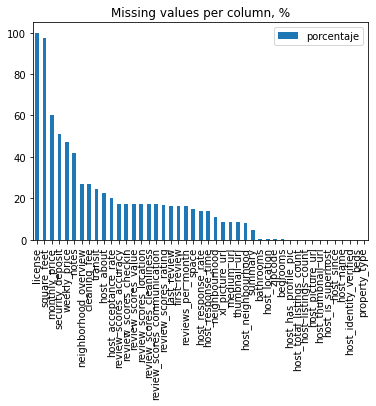

In [6]:
# Missing values
missing_values_col= listings_df.isnull().sum().to_frame() 
missing_values_col['porcentaje'] = (missing_values_col[0]/listings_df.shape[0])*100
col_with_nan= missing_values_col[missing_values_col.porcentaje > 0.00]
col_with_nan = col_with_nan[['porcentaje']]
col_without_nan = missing_values_col[missing_values_col.porcentaje == 0.00]
print('columns without missing values: '+ str(col_without_nan.shape[0]))
print(list(col_without_nan.index.values))

print('columns with missing values: '+ str(col_with_nan.shape[0]))
col_with_nan.sort_values(by=['porcentaje'], ascending=False).plot.bar(title='Missing values per column, %')

# ***DATASET: calendar_df***

This dataset shows availability dates.

In [7]:
#shape dataset 

print( 'row: ' + str(calendar_df.shape[0]))
print( 'columns: ' + str(calendar_df.shape[1]))

row: 1393570
columns: 4


In [8]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


columns without missing values: 3
['listing_id', 'date', 'available']
columns with missing values: 1


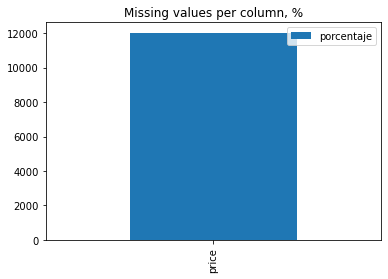

In [9]:
# Missing values
missing_values_col= calendar_df.isnull().sum().to_frame() 
missing_values_col['porcentaje'] = (missing_values_col[0]/listings_df.shape[0])*100
col_with_nan= missing_values_col[missing_values_col.porcentaje > 0.00]
col_with_nan = col_with_nan[['porcentaje']]
col_without_nan = missing_values_col[missing_values_col.porcentaje == 0.00]
print('columns without missing values: '+ str(col_without_nan.shape[0]))
print(list(col_without_nan.index.values))

print('columns with missing values: '+ str(col_with_nan.shape[0]))
col_with_nan.sort_values(by=['porcentaje'], ascending=False).plot.bar(title='Missing values per column, %')

# **Prepare data**

In [10]:
#Drop columns with more 50% of missing values
def drop_columns(df,percentage):
    missing_values_col= df.isnull().sum().to_frame() 
    missing_values_col['porcentaje'] = (missing_values_col[0]/listings_df.shape[0])*100
    col_with_nan= missing_values_col[missing_values_col.porcentaje > percentage]
    col_names=list(col_with_nan.index.values)
    df.drop(col_names, inplace=True, axis=1)
    return col_names, df  

def info_to_col(df):
    missing_values_col= df.isnull().sum().to_frame() 
    missing_values_col['porcentaje'] = (missing_values_col[0]/listings_df.shape[0])*100
    df_temp=df.dropna()
    col_names=list(missing_values_col.index.values)
    for i in col_names:
        print('col: '+ str(i) + ', type: ' + str(df[i].dtypes) + ', % missing values: ' + str(missing_values_col['porcentaje'].loc[i]) +', example: ' + str(df_temp[i].iloc[0]))

    

# **Drop columns**
Drop columns when its percentage of missiing values is greater than 30% for listings_df and  50% for calendar_df

In [11]:
drop_columns(listings_df,30)
drop_columns(calendar_df,50)
print('listings_df: ' + str(listings_df.shape))
print('calendar_df: ' + str(calendar_df.shape))

listings_df: (3818, 86)
calendar_df: (1393570, 3)


# **Select features**

Select, prepare and impute the features to interest

**listings_df**

Features to select:  
id , experiences_offered, host_since (convert to date), host_response_rate (convert to numeric), host_acceptance_rate (convert to numeric),host_is_superhost (convert to binary), host_total_listings_count,host_has_profile_pic (convert to binary), host_identity_verified (convert to binary), neighbourhood_group_cleansed, property_type, room_type, accommodates, bathrooms, bedrooms, price (convert to numeric), minimum_nights, number_of_reviews, first_review (convert to date), last_review (convert to date),cancellation_policy.

In [12]:
info_to_col(listings_df)

col: id, type: int64, % missing values: 0.0, example: 953595
col: listing_url, type: object, % missing values: 0.0, example: https://www.airbnb.com/rooms/953595
col: scrape_id, type: int64, % missing values: 0.0, example: 20160104002432
col: last_scraped, type: object, % missing values: 0.0, example: 2016-01-04
col: name, type: object, % missing values: 0.0, example: Bright & Airy Queen Anne Apartment
col: summary, type: object, % missing values: 4.6359350445259295, example: Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria.  No smoking, no pets.  Designed for healthy living, so breathe easy.
col: space, type: object, % missing values: 14.903090623363017, example: Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne.  A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, fre

In [13]:
listings_df = listings_df[["id","experiences_offered","host_since", "host_response_rate",
                          "host_acceptance_rate","host_is_superhost","host_total_listings_count","host_has_profile_pic",
                           "host_identity_verified","neighbourhood_group_cleansed","property_type","room_type",
                          "accommodates","bathrooms","bedrooms","price","minimum_nights", "number_of_reviews",
                          "first_review","last_review","cancellation_policy"]]

In [14]:
# convert to numeric
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace('%', '').astype("float")
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.replace('%', '').astype("float")
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")

In [15]:
#Separate features in object y numeric to impunting 
listings_df.set_index('id',inplace=True)
listings_df_object=listings_df.select_dtypes(include=['object'])
listings_df_numeric=listings_df.select_dtypes(exclude=['object'])

In [16]:
#Imputation : numeric features
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
listings_df_numeric_imp= pd.DataFrame(imp.fit_transform(listings_df_numeric))
listings_df_numeric_imp.columns = listings_df_numeric.columns
listings_df_numeric_imp.index = listings_df_numeric.index

In [17]:
#Imputation : category features
imp = SimpleImputer(strategy="most_frequent")
listings_df_object_imp=pd.DataFrame(imp.fit_transform(listings_df_object))
listings_df_object_imp.columns = listings_df_object.columns
listings_df_object_imp.index = listings_df_object.index

In [18]:
listings_df_final = pd.concat([listings_df_numeric_imp, listings_df_object_imp],axis=1).reset_index()
print(listings_df_final.shape)

(3818, 21)


In [19]:
# convert to date
listings_df_final["host_since"]=pd.to_datetime(listings_df_final['host_since'])
listings_df_final["first_review"]=pd.to_datetime(listings_df_final['first_review'])
listings_df_final["last_review"]=pd.to_datetime(listings_df_final['last_review'])

In [20]:
# convert to binary
listings_df_final['host_is_superhost'] = listings_df_final['host_is_superhost'].str.replace('t', '1').str.replace('f', '0').astype("float")
listings_df_final['host_has_profile_pic'] = listings_df_final['host_has_profile_pic'].str.replace('t', '1').str.replace('f', '0').astype("float")
listings_df_final['host_identity_verified'] = listings_df_final['host_identity_verified'].str.replace('t', '1').str.replace('f', '0').astype("float")


In [21]:
listings_df_final.head()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,...,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,first_review,last_review,cancellation_policy
0,241032,96.000000,100.000000,3.0,4.0,1.0,1.0,85.0,1.0,207.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate
1,953595,98.000000,100.000000,6.0,4.0,1.0,1.0,150.0,2.0,43.0,...,2013-02-21,1.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2013-08-19,2015-12-29,strict
2,3308979,67.000000,100.000000,2.0,11.0,4.5,5.0,975.0,4.0,20.0,...,2014-06-12,0.0,1.0,1.0,Queen Anne,House,Entire home/apt,2014-07-30,2015-09-03,strict
3,7421966,94.886798,99.967159,1.0,3.0,1.0,0.0,100.0,1.0,0.0,...,2013-11-06,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2015-09-21,2016-01-02,flexible
4,278830,100.000000,99.967159,2.0,6.0,2.0,3.0,450.0,1.0,38.0,...,2011-11-29,0.0,1.0,1.0,Queen Anne,House,Entire home/apt,2012-07-10,2015-10-24,strict


**Calendar_df**

Features to select:  
listing_id, date (convert to date), available (convert to binary)


In [22]:
info_to_col(calendar_df)

col: listing_id, type: int64, % missing values: 0.0, example: 241032
col: date, type: object, % missing values: 0.0, example: 2016-01-04
col: available, type: object, % missing values: 0.0, example: t


In [23]:
# convert to date
calendar_df["date"]=pd.to_datetime(calendar_df['date'])
# convert to binary
calendar_df['available'] = calendar_df['available'].str.replace('t', '1').str.replace('f', '0').astype("float")

In [24]:
# Get month, weekday and day of date.
calendar_df.columns=['id', 'date','available']
calendar_df['Month'] = calendar_df['date'].dt.month_name()
calendar_df["Weekday"]=calendar_df['date'].dt.day_name()
calendar_df["Day"]=calendar_df['date'].dt.day

In [25]:
calendar_df.head()

,id,date,available,Month,Weekday,Day
0,241032,2016-01-04,1.0,January,Monday,4
1,241032,2016-01-05,1.0,January,Tuesday,5
2,241032,2016-01-06,0.0,January,Wednesday,6
3,241032,2016-01-07,0.0,January,Thursday,7
4,241032,2016-01-08,0.0,January,Friday,8


# **Analyze, Model, and Visualize**

After to prepared data, these are ready to anwers.

**1.How the features of places influence in its occupation?**

In [27]:
#Group by place of day and available days 
listing_occupation = calendar_df.groupby('id').agg({'date': ['count'],'available': ['sum']})

In [28]:
# Build target feature and dataframe to analyzed
listing_occupation.columns = ['days_total', 'day_available']
listing_occupation['percentage_occupation']= (listing_occupation['days_total']-listing_occupation['day_available'])/listing_occupation['days_total']
listing_occupation=listing_occupation.reset_index()
listing_occupation.columns = ['id', 'days_total', 'day_available','percentage_occupation']
listing_occupation_features = listing_occupation.merge(listings_df_final, on='id', how='inner')
listing_occupation_features.set_index('id',inplace=True)

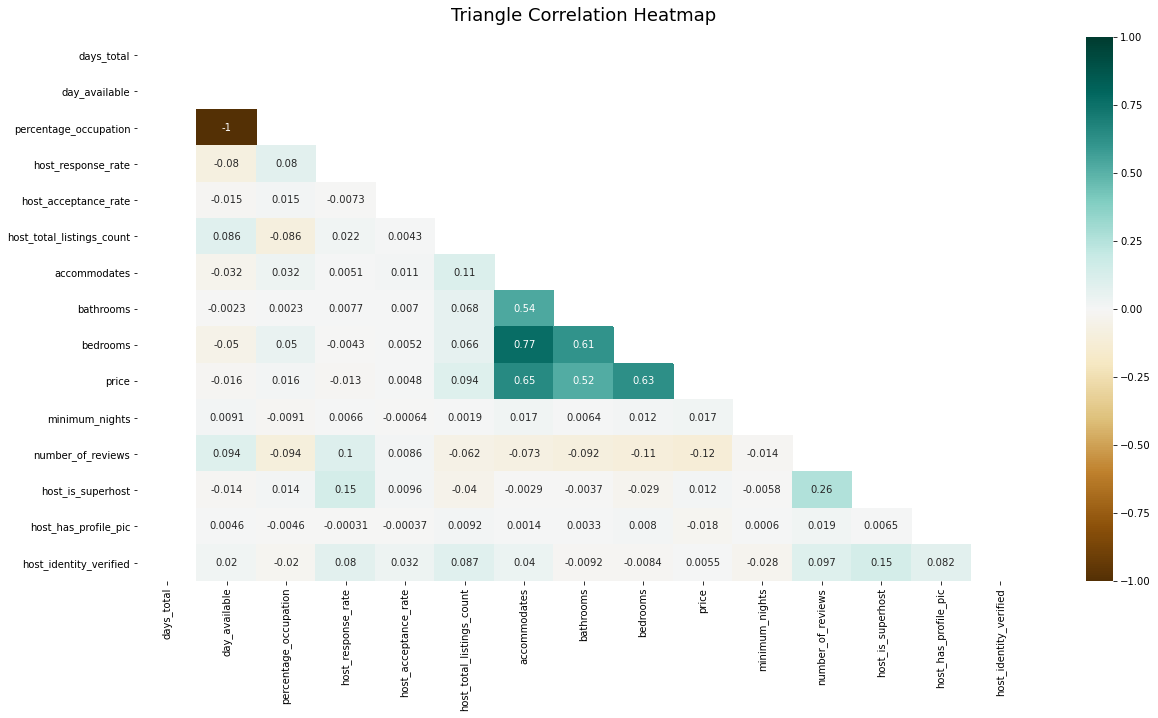

In [29]:
#Correlation between features.
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(listing_occupation_features.corr(), dtype=np.bool))
heatmap = sns.heatmap(listing_occupation_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

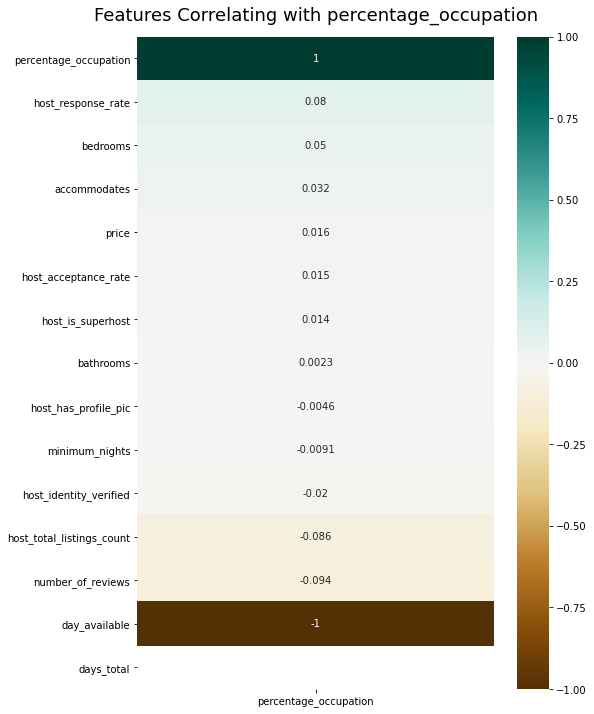

In [30]:
#Correlation between features with target feature.
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(listing_occupation_features.corr()[['percentage_occupation']].sort_values(by='percentage_occupation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with percentage_occupation', fontdict={'fontsize':18}, pad=16);

**2.How is the occupation this places in analyzed time?**

In [32]:
# Build dataframe to analyzed
calendar_df_time_features = calendar_df.merge(listings_df_final, on='id', how='inner')
calendar_df_time_features.head()

,id,date,available,Month,Weekday,Day,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,...,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,first_review,last_review,cancellation_policy
0,241032,2016-01-04,1.0,January,Monday,4,96.0,100.0,3.0,4.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate
1,241032,2016-01-05,1.0,January,Tuesday,5,96.0,100.0,3.0,4.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate
2,241032,2016-01-06,0.0,January,Wednesday,6,96.0,100.0,3.0,4.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate
3,241032,2016-01-07,0.0,January,Thursday,7,96.0,100.0,3.0,4.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate
4,241032,2016-01-08,0.0,January,Friday,8,96.0,100.0,3.0,4.0,...,2011-08-11,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,2011-11-01,2016-01-02,moderate


# property_type : Month and Weekday

In [33]:
# Build target feature and dataframe to analyzed
time_by_property_type = calendar_df_time_features[['id','property_type','available','Month','Weekday']]
time_by_property_type = time_by_property_type.groupby(['property_type', 'Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_property_type.columns = ['property_type','Month','Weekday','listings_total','listings_available']
time_by_property_type['percentage_occupation']= round(((time_by_property_type['listings_total']-time_by_property_type['listings_available'])/time_by_property_type['listings_total'])*100)

listings by Apartment : 1708
listings by Bed & Breakfast : 37
listings by Boat : 8
listings by Bungalow : 13
listings by Cabin : 21
listings by Camper/RV : 13
listings by Chalet : 2
listings by Condominium : 91
listings by Dorm : 2
listings by House : 1734
listings by Loft : 40
listings by Other : 22
listings by Tent : 5
listings by Townhouse : 118
listings by Treehouse : 3
listings by Yurt : 1


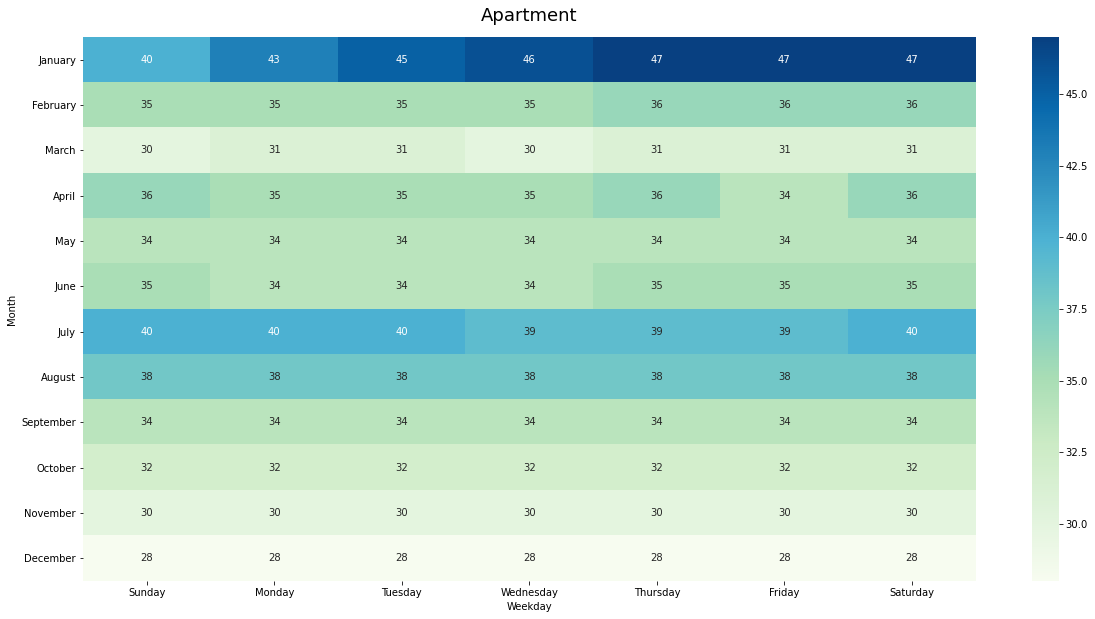

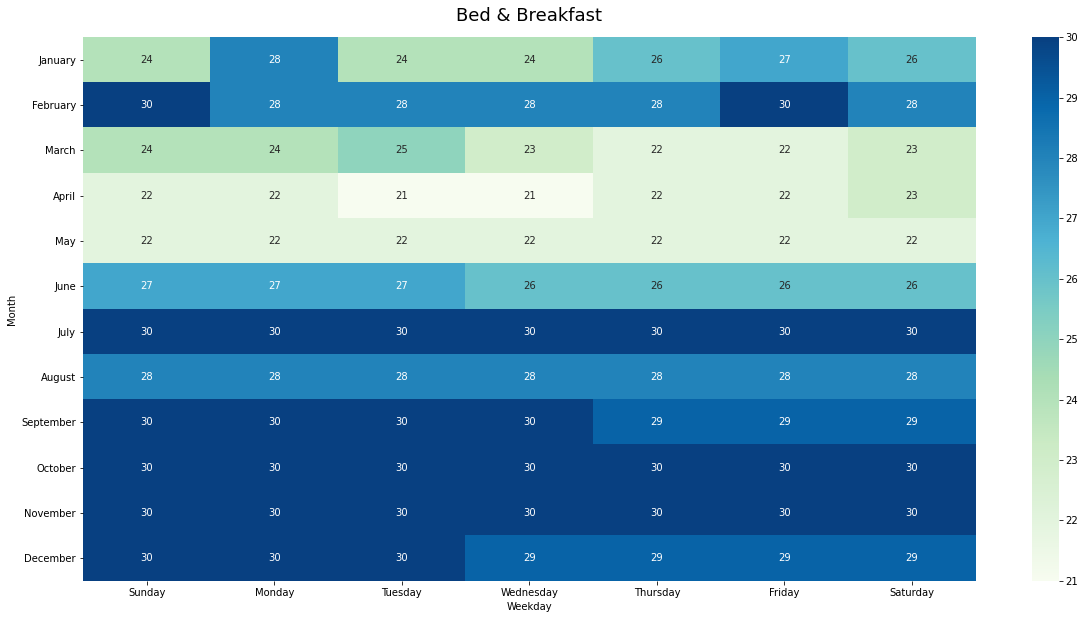

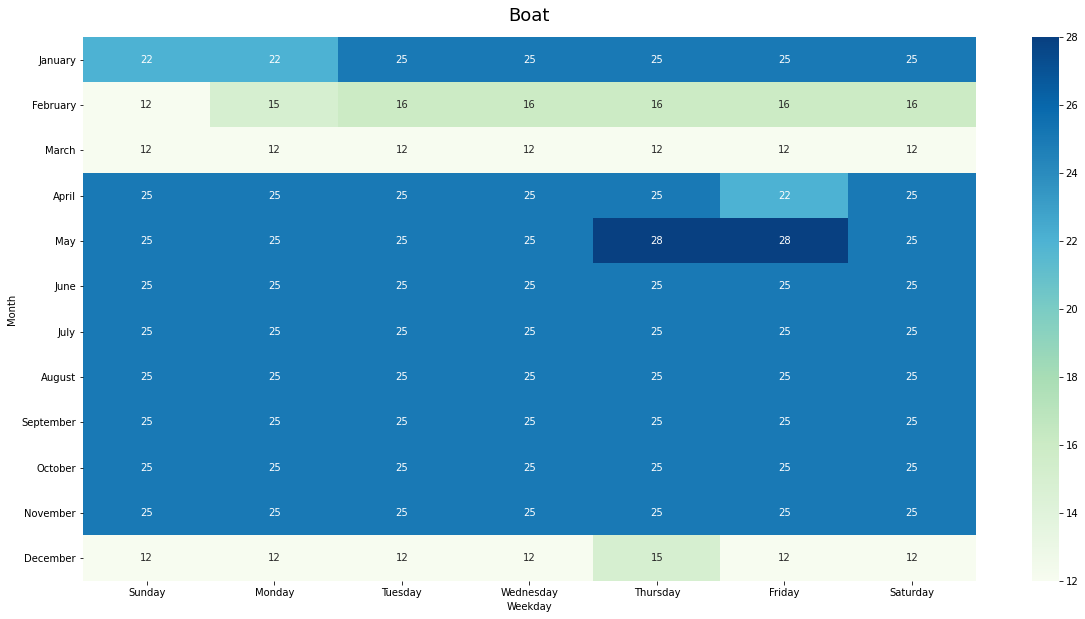

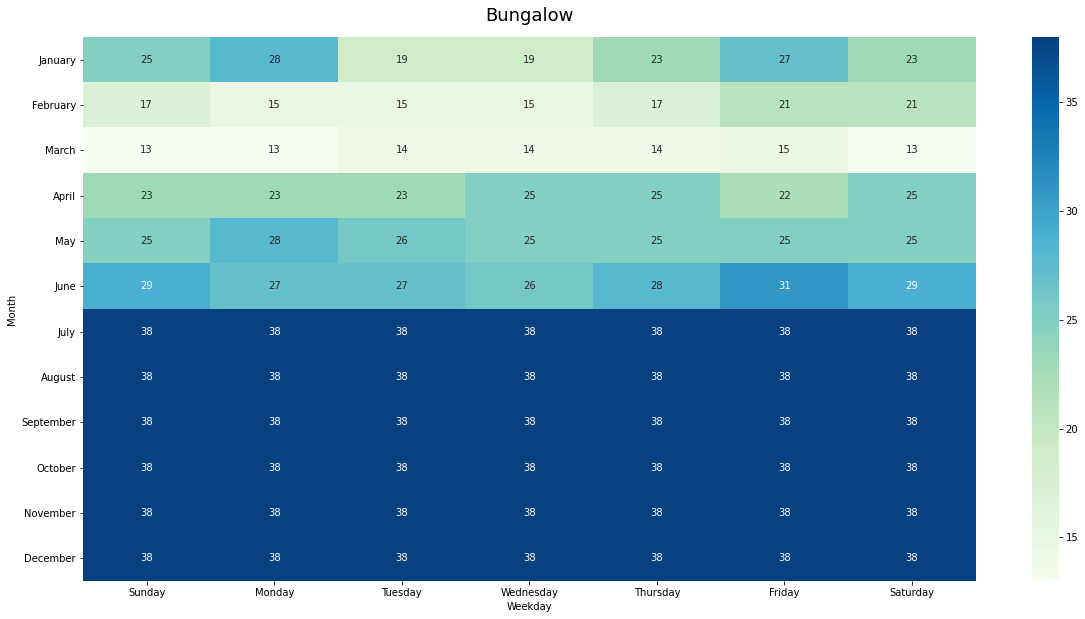

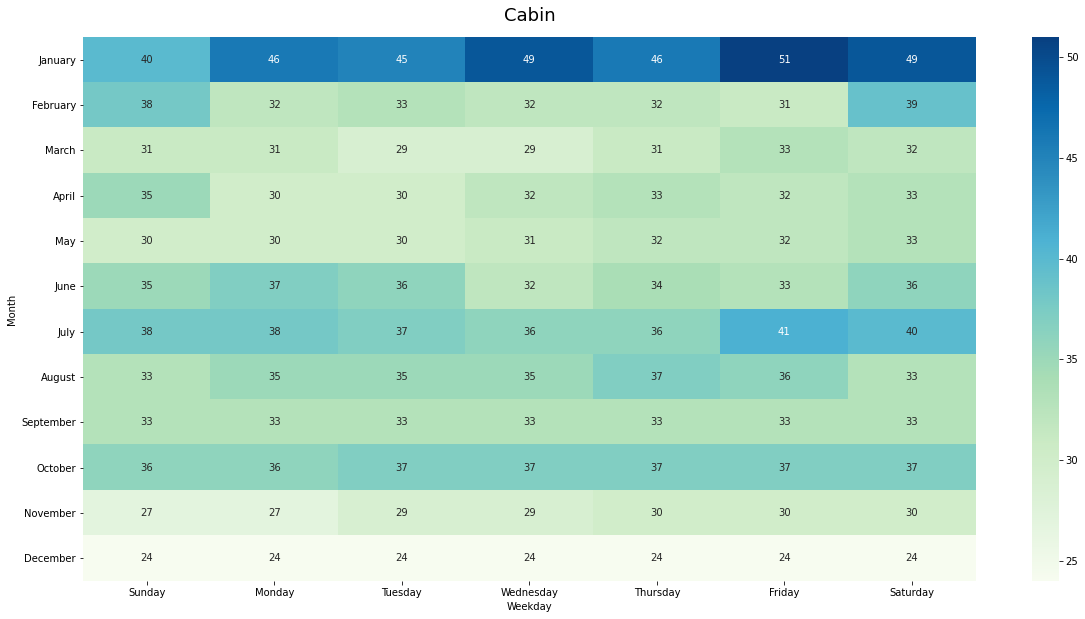

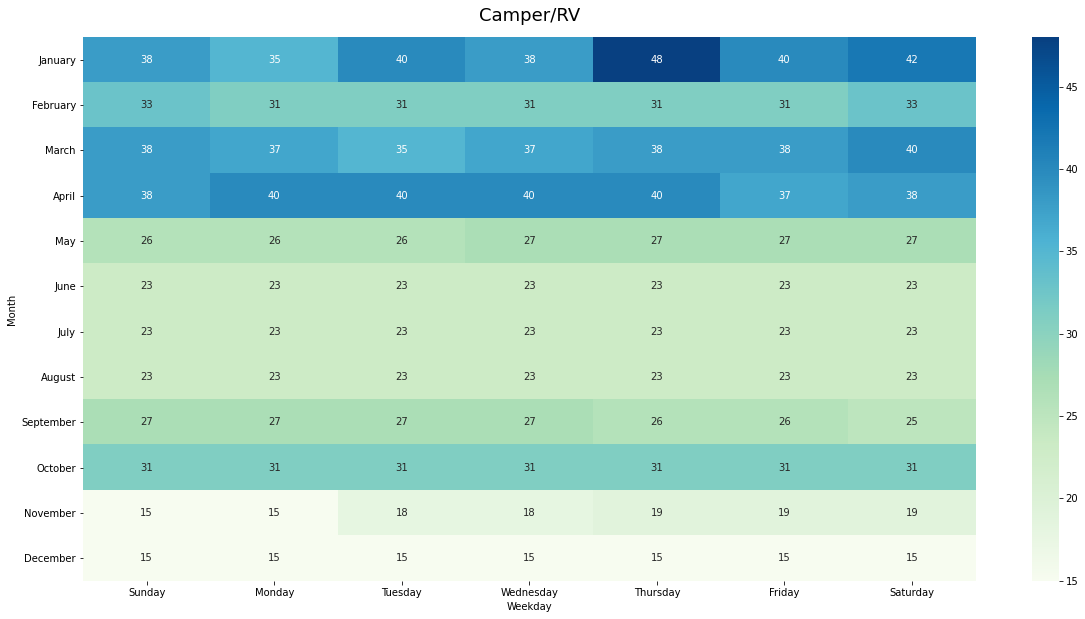

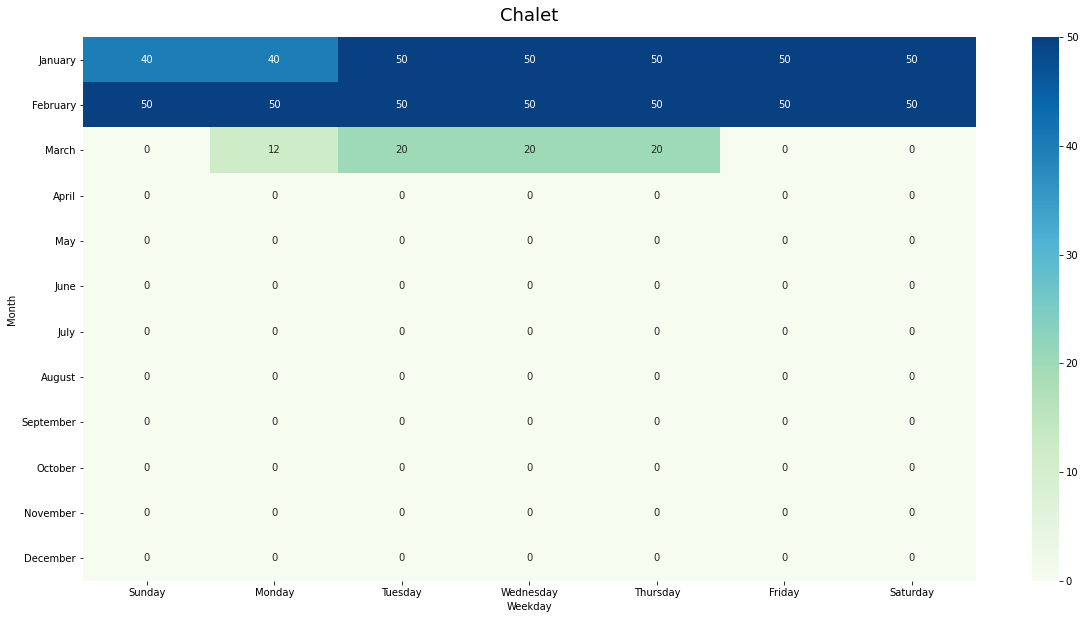

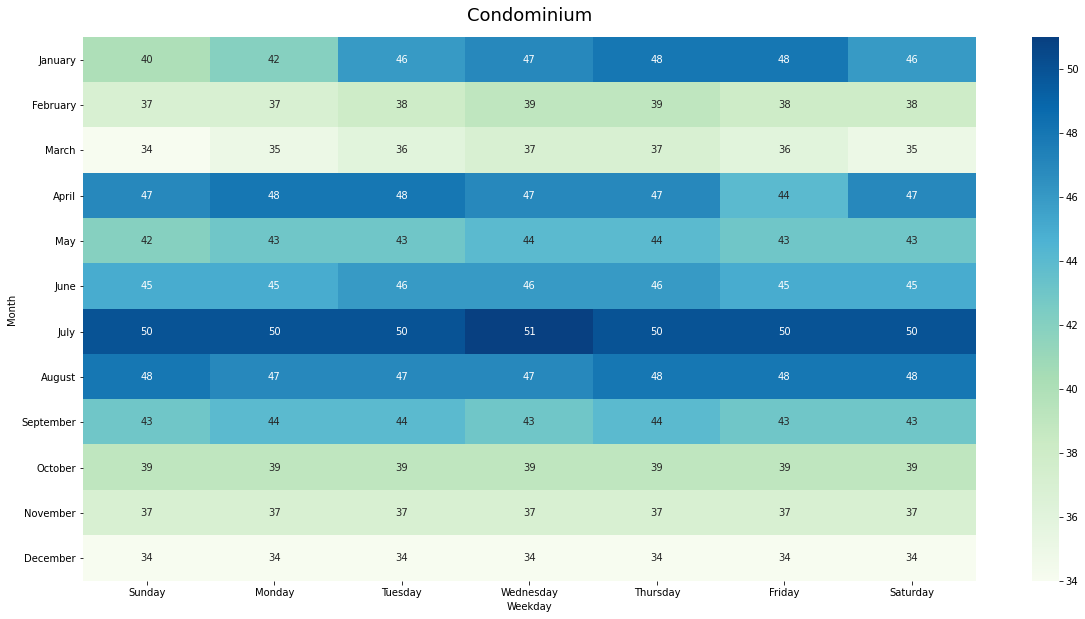

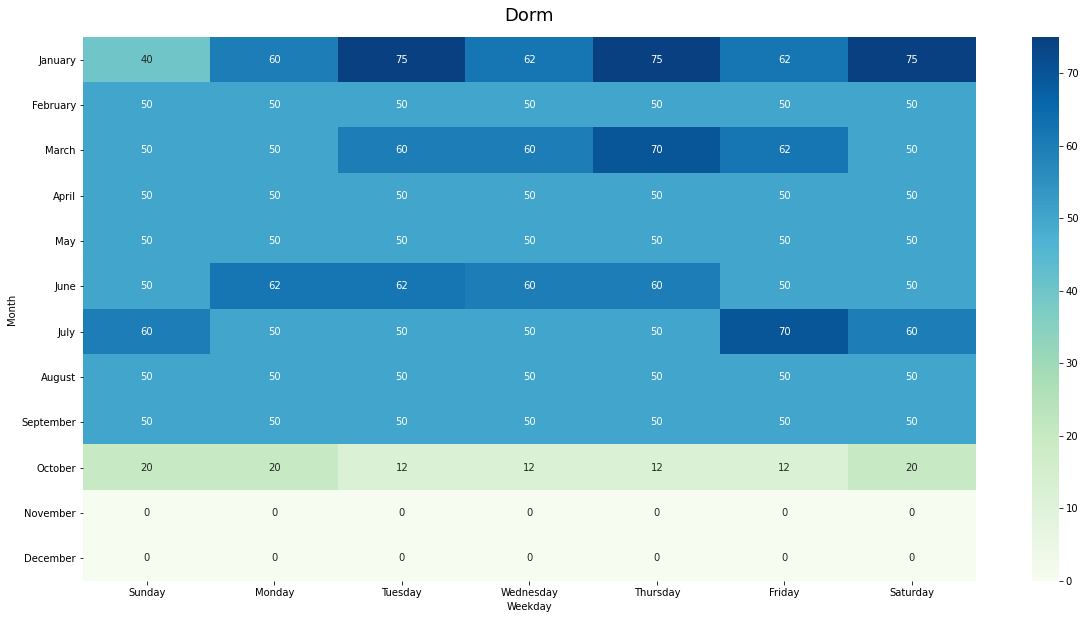

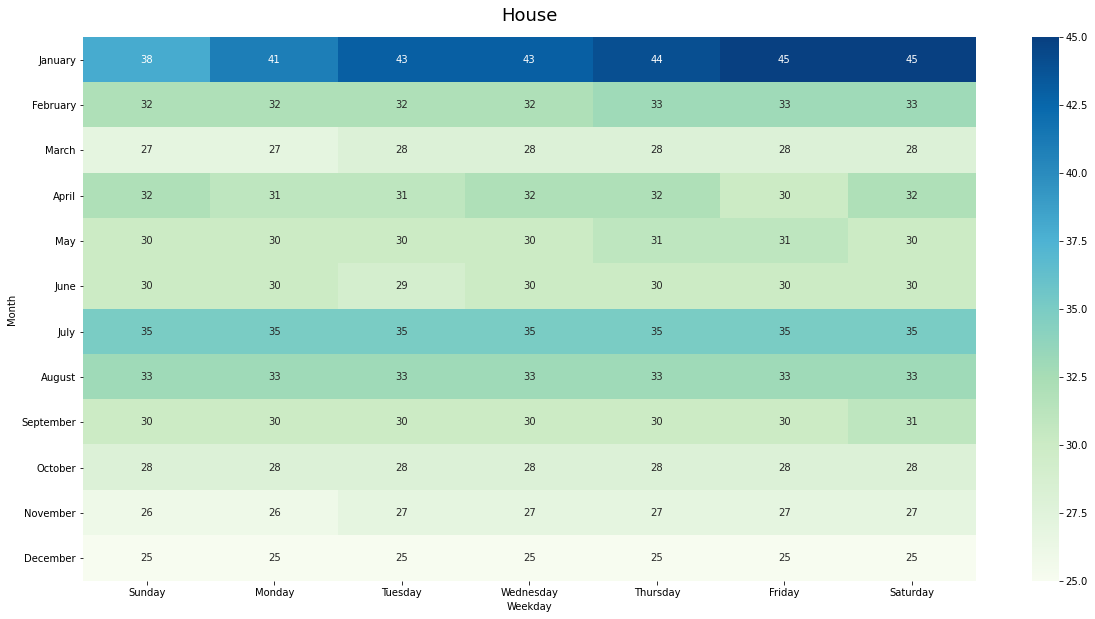

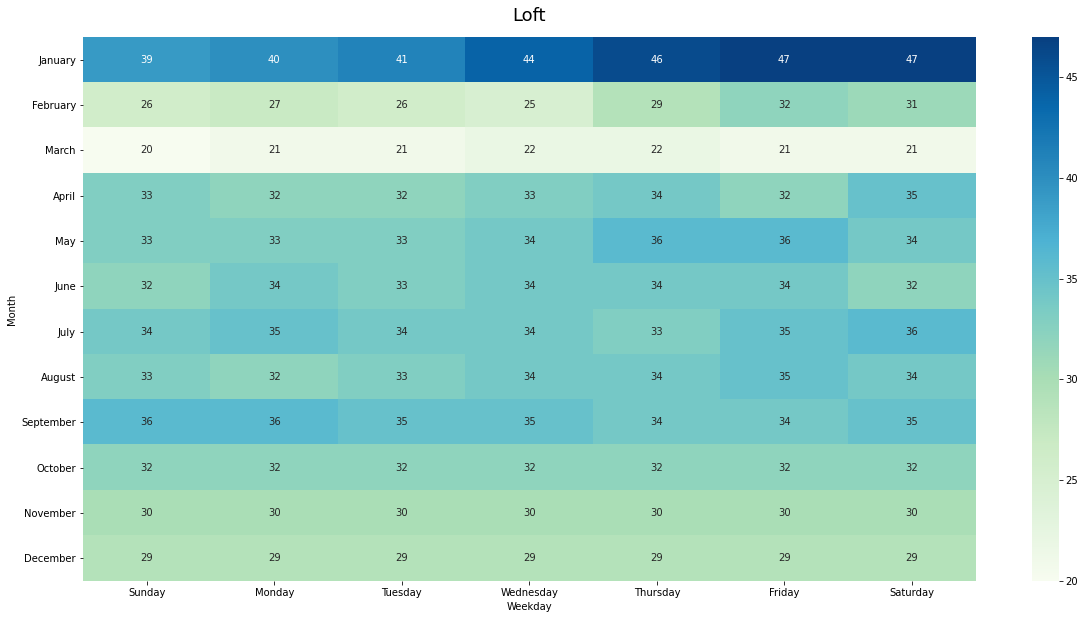

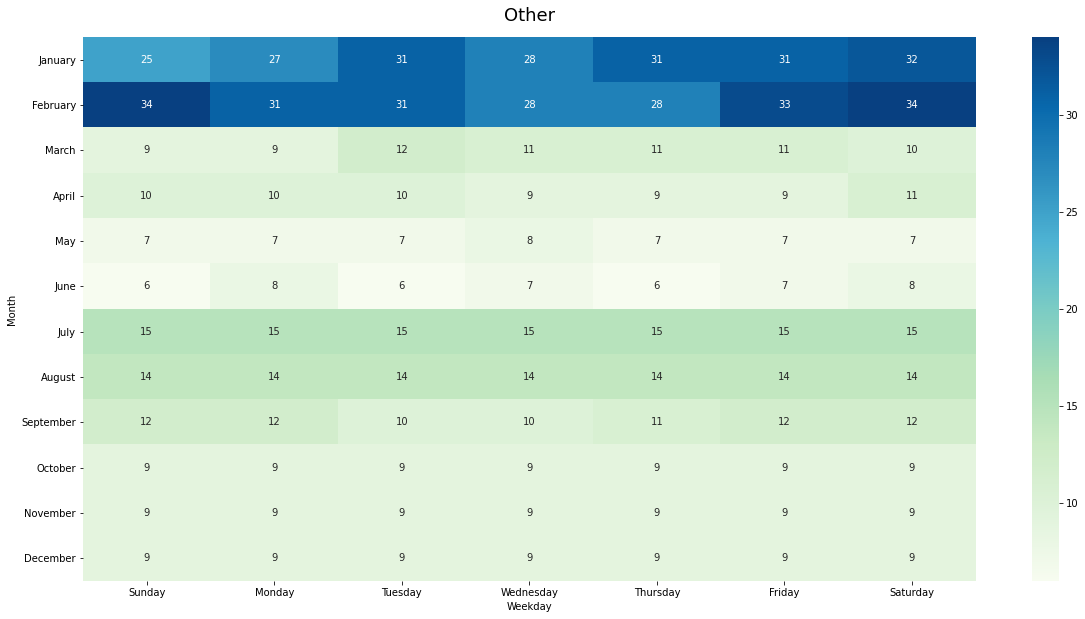

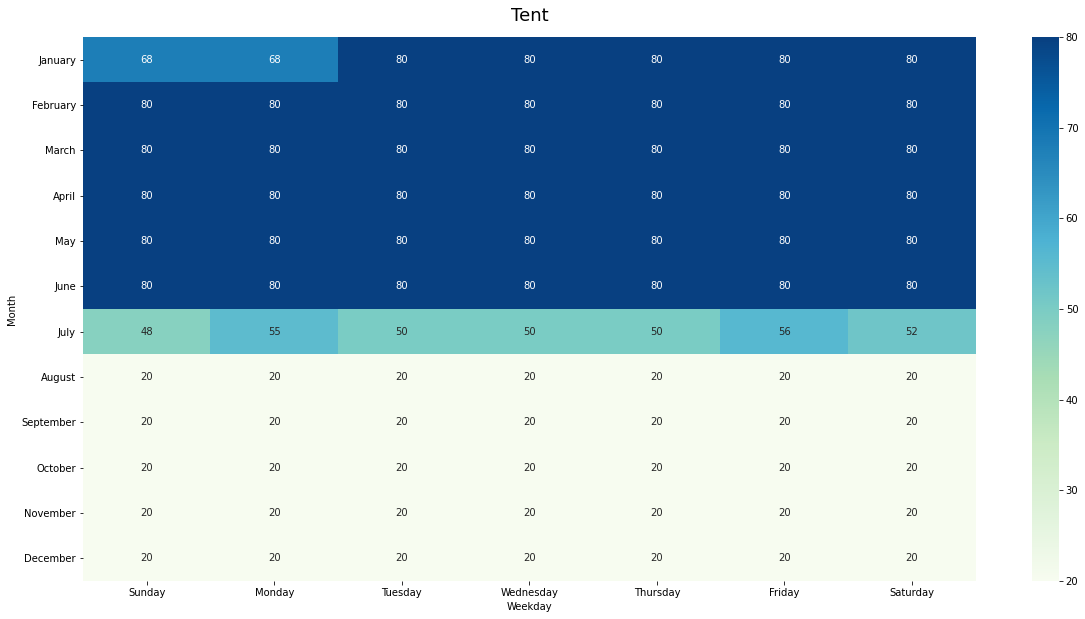

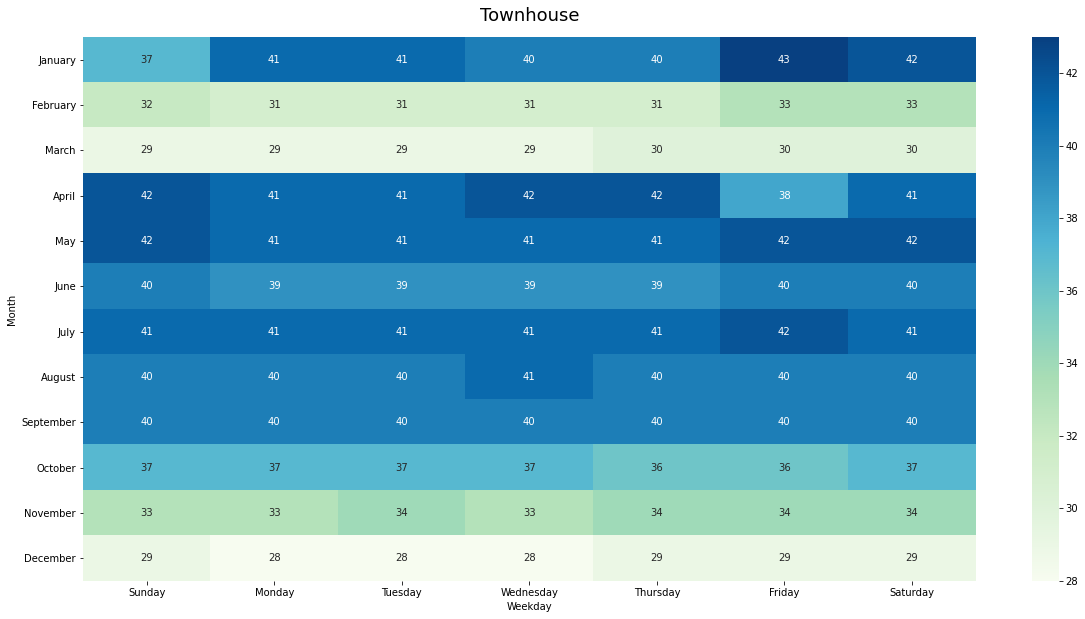

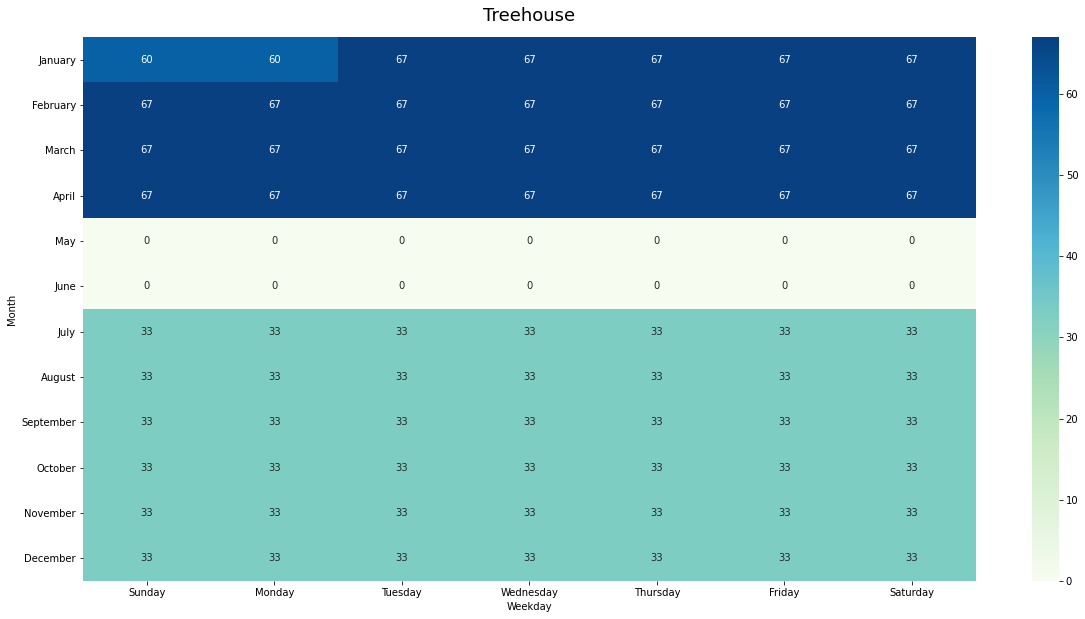

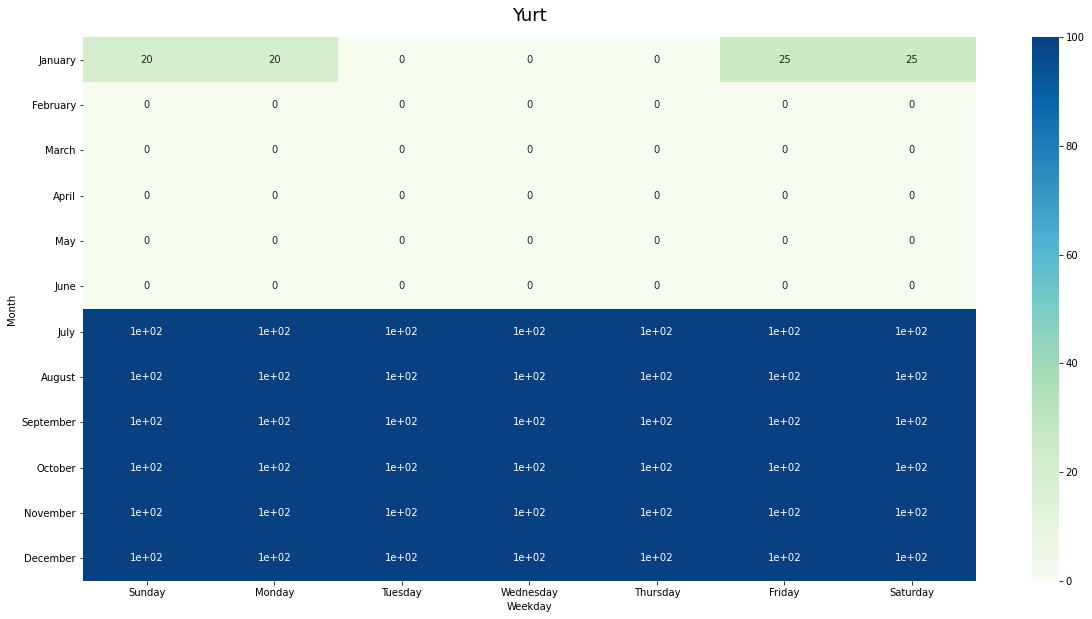

In [36]:
# Occupation percentage by property type.

for item in  list(time_by_property_type["property_type"].unique()):
    print("listings by "+ str(item)+" : " + str(len(calendar_df_time_features[calendar_df_time_features['property_type'] == item]["id"].unique())))
    df = time_by_property_type[time_by_property_type['property_type'] == item]
    df= df[["Month","Weekday","percentage_occupation"]]
    df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df = df.reindex(new_order, axis=0)
    new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    df = df[new_order_col]
    plt.figure(figsize=(20,10))
    heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
    heatmap.set_title(item, fontdict={'fontsize':18}, pad=16);

# room_type : Month and Weekday


In [37]:
# Build target feature and dataframe to analyzed
time_by_room_type = calendar_df_time_features[['id','room_type','available','Month','Weekday']]
time_by_room_type= time_by_room_type.groupby(['room_type', 'Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_room_type.columns = ['type','Month','Weekday','listings_total','listings_available']
time_by_room_type['percentage_occupation']= round(((time_by_room_type['listings_total']-time_by_room_type['listings_available'])/time_by_room_type['listings_total'])*100)

listings mean by Entire home/apt : 2541
listings mean by Private room : 1160
listings mean by Shared room : 117


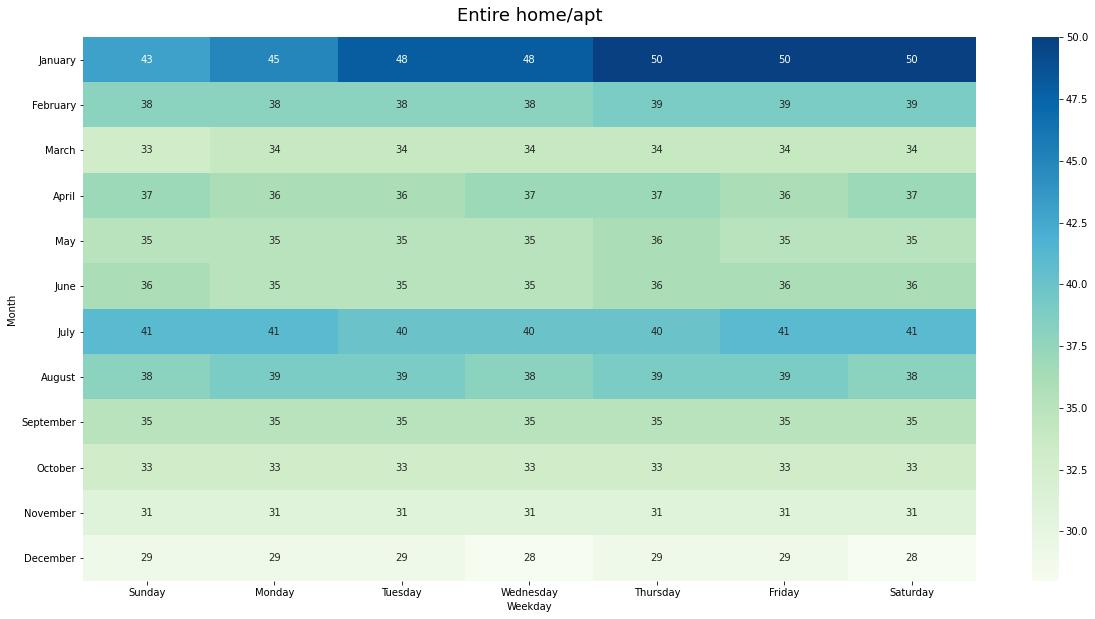

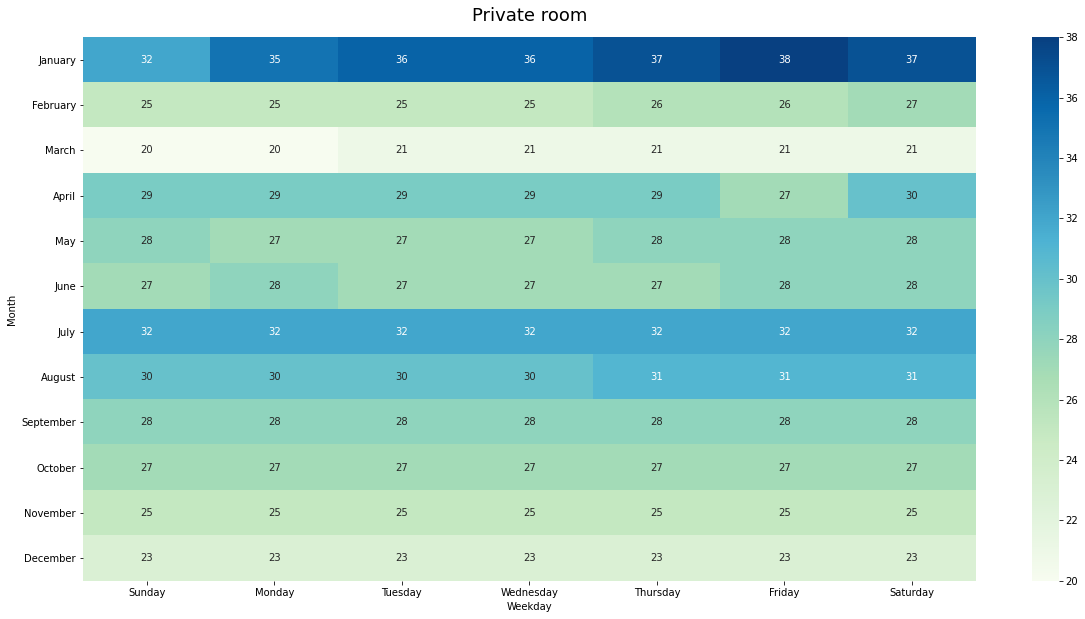

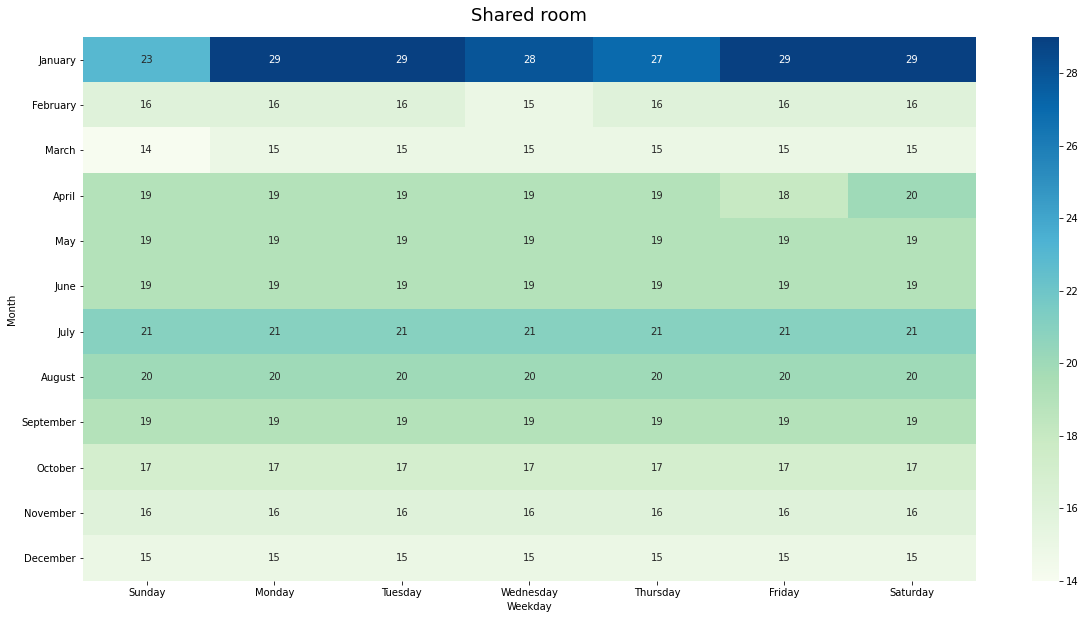

In [38]:
# Occupation percentage by room type.

for item in  list(time_by_room_type["type"].unique()):
    print("listings mean by "+ str(item)+" : " + str(len(calendar_df_time_features[calendar_df_time_features['room_type'] == item]["id"].unique())))
    df = time_by_room_type[time_by_room_type['type'] == item]
    df= df[["Month","Weekday","percentage_occupation"]]
    df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df = df.reindex(new_order, axis=0)
    new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    df = df[new_order_col]
    plt.figure(figsize=(20,10))
    heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
    heatmap.set_title(item, fontdict={'fontsize':18}, pad=16);

# neighbourhood_group_cleansed : Month and Weekday

In [39]:
# Build target feature and dataframe to analyzed
time_by_neighbourhood = calendar_df_time_features[['id','neighbourhood_group_cleansed','available','Month','Weekday']]
time_by_neighbourhood= time_by_neighbourhood.groupby(['neighbourhood_group_cleansed', 'Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_neighbourhood.columns = ['type','Month','Weekday','listings_total','listings_available']
time_by_neighbourhood['percentage_occupation']= round(((time_by_neighbourhood['listings_total']-time_by_neighbourhood['listings_available'])/time_by_neighbourhood['listings_total'])*100)

listings mean by Ballard : 230
listings mean by Beacon Hill : 118
listings mean by Capitol Hill : 567
listings mean by Cascade : 89
listings mean by Central Area : 369
listings mean by Delridge : 79
listings mean by Downtown : 530
listings mean by Interbay : 11
listings mean by Lake City : 67
listings mean by Magnolia : 61
listings mean by Northgate : 80
listings mean by Other neighborhoods : 794
listings mean by Queen Anne : 295
listings mean by Rainier Valley : 159
listings mean by Seward Park : 44
listings mean by University District : 122
listings mean by West Seattle : 203


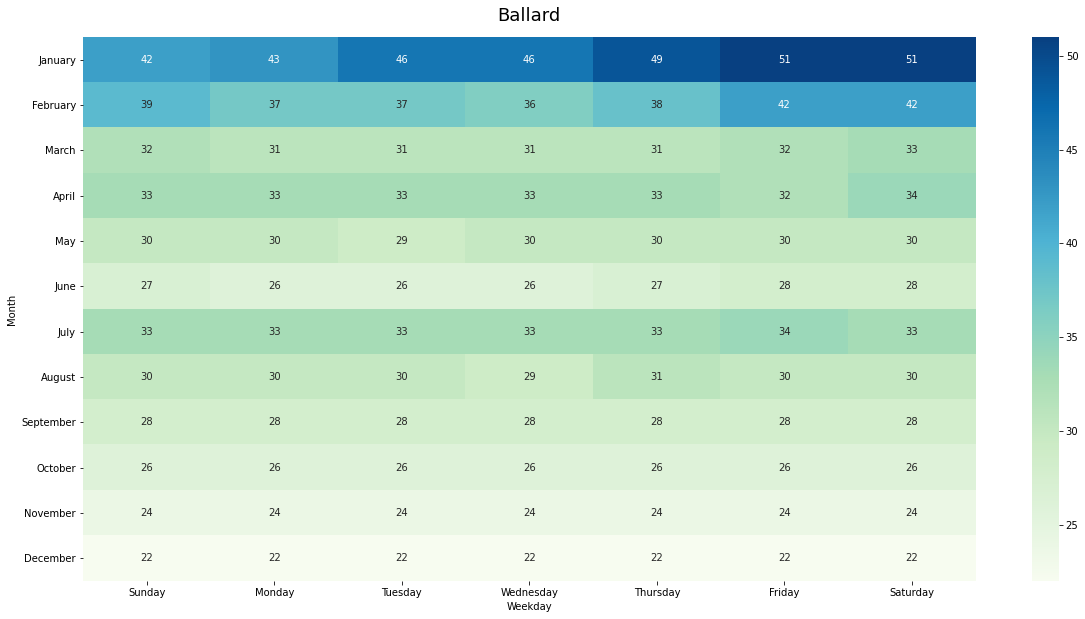

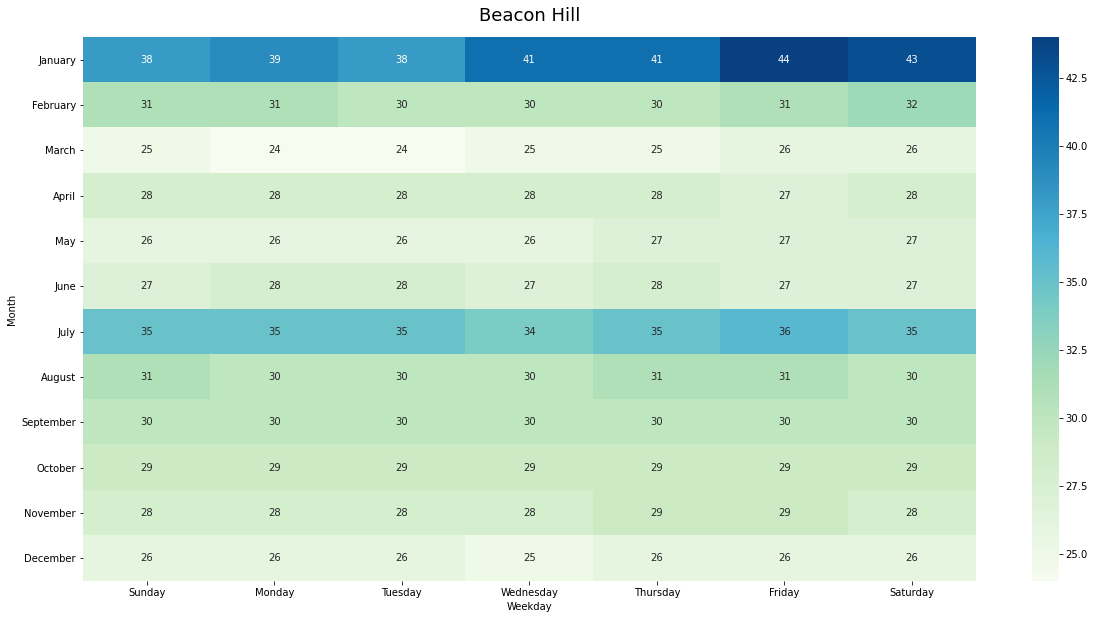

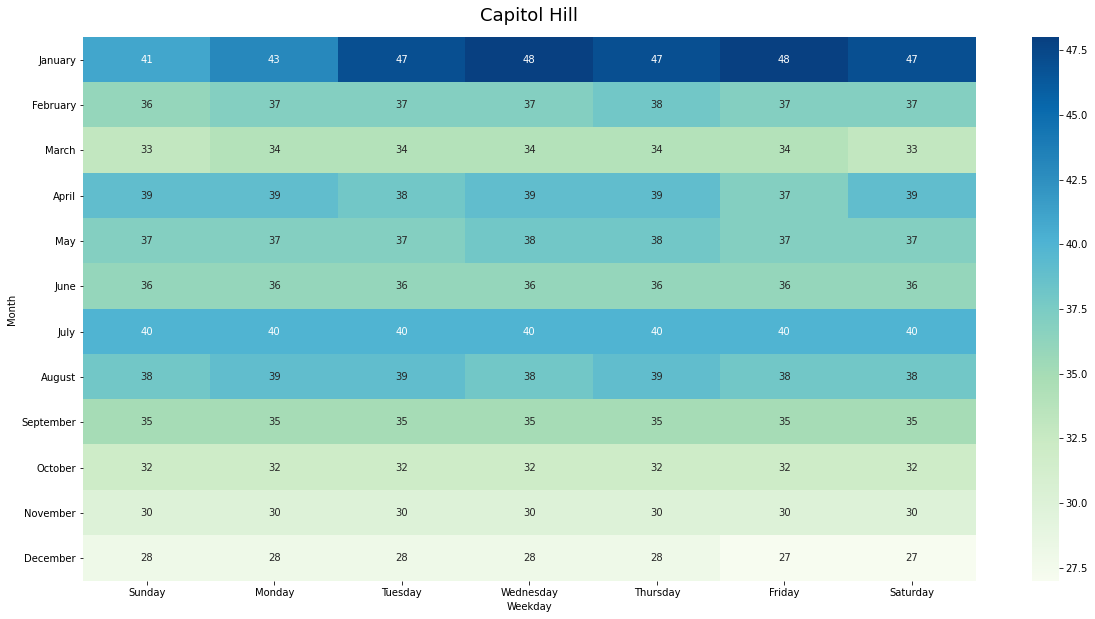

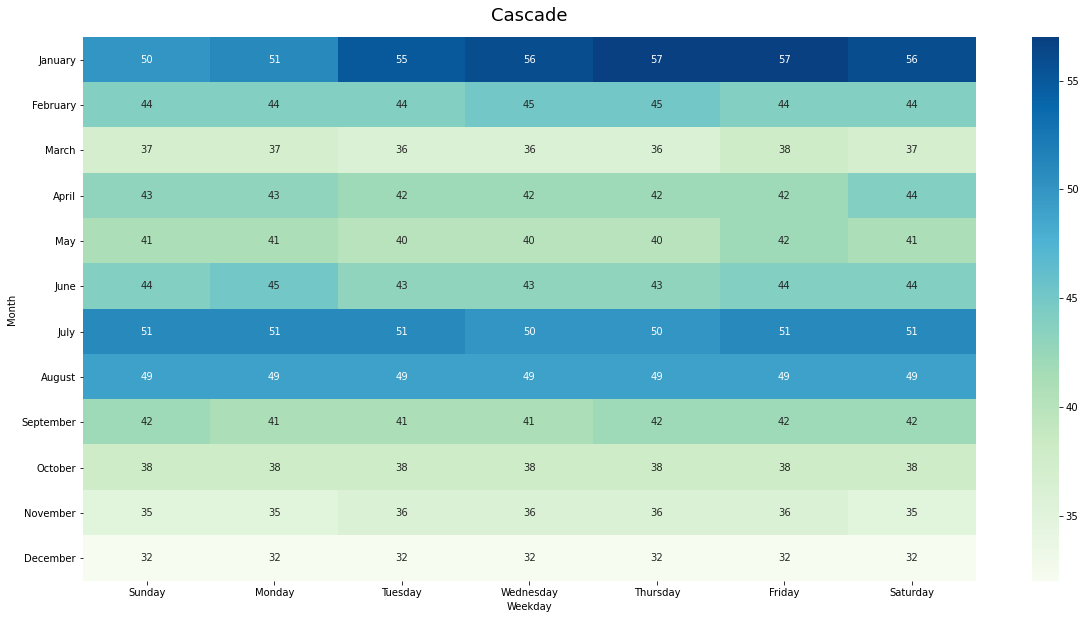

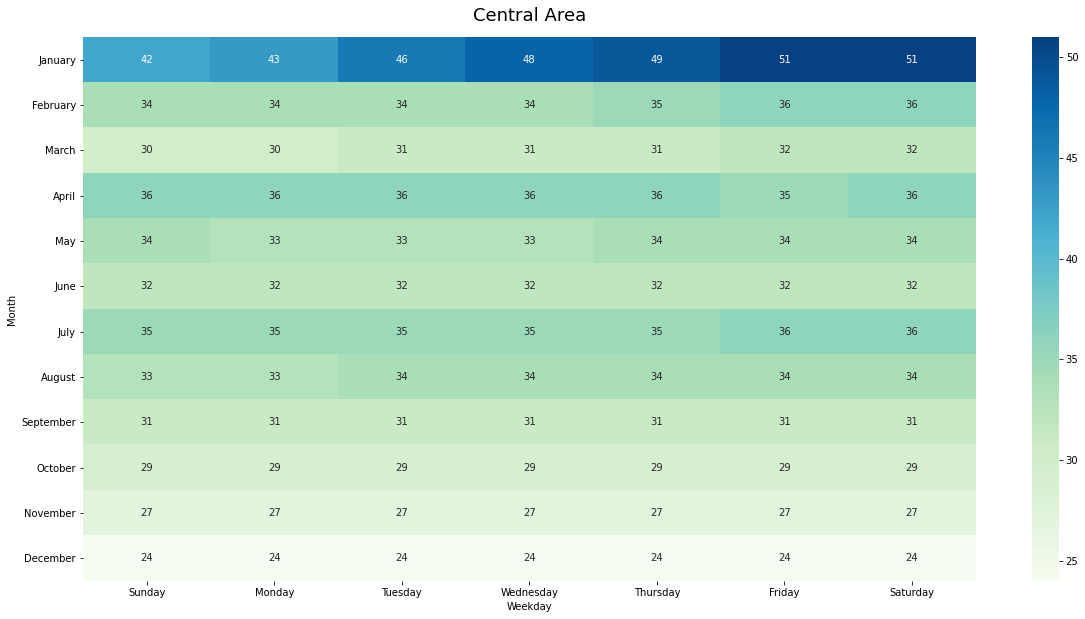

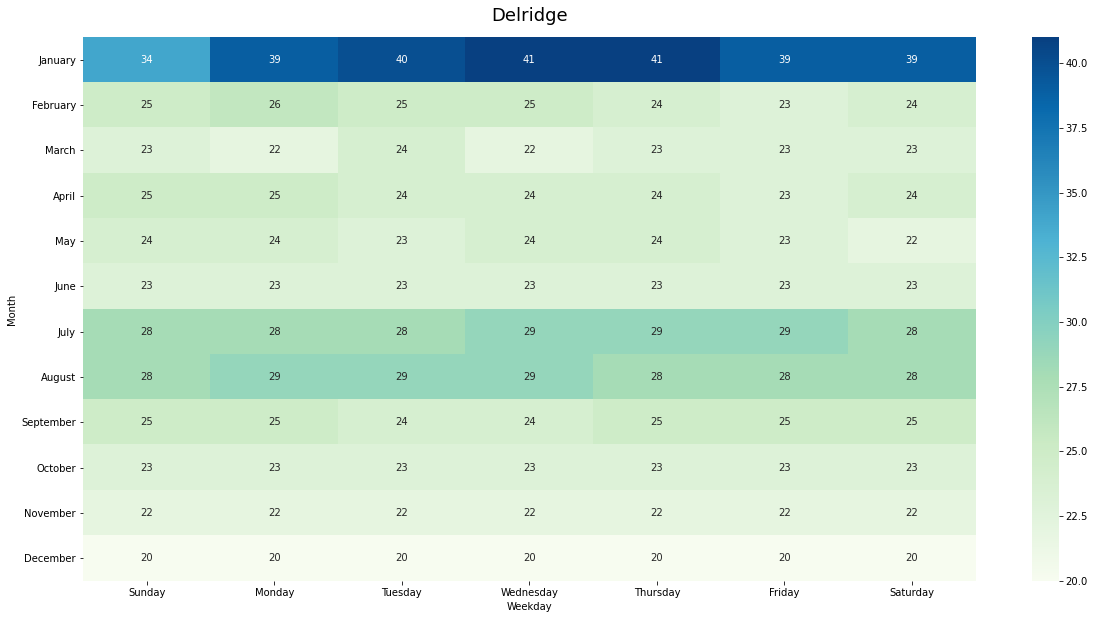

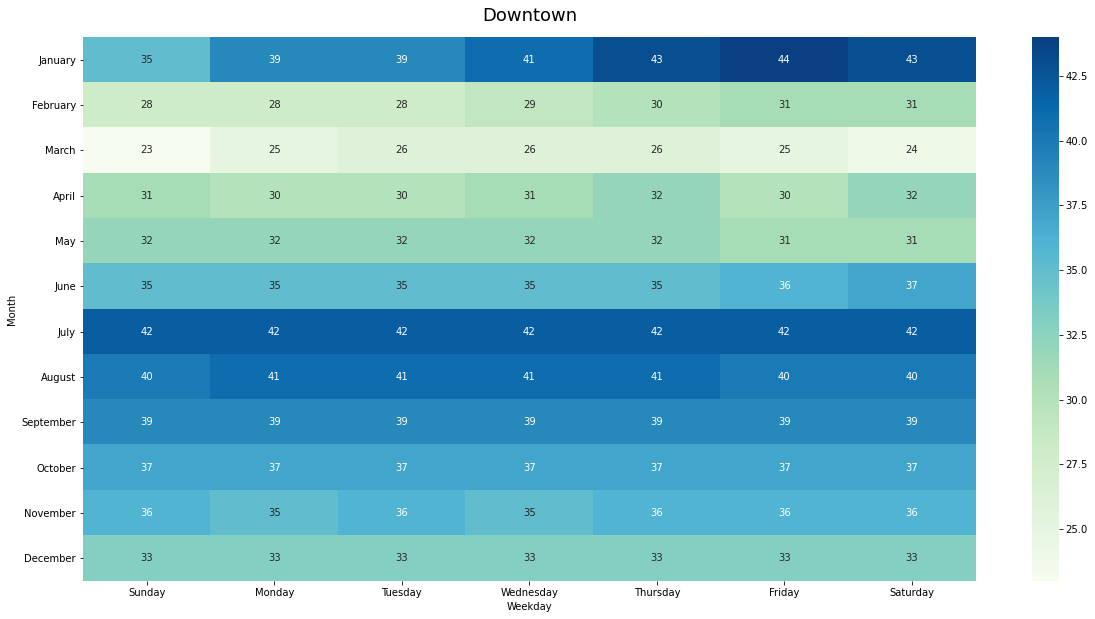

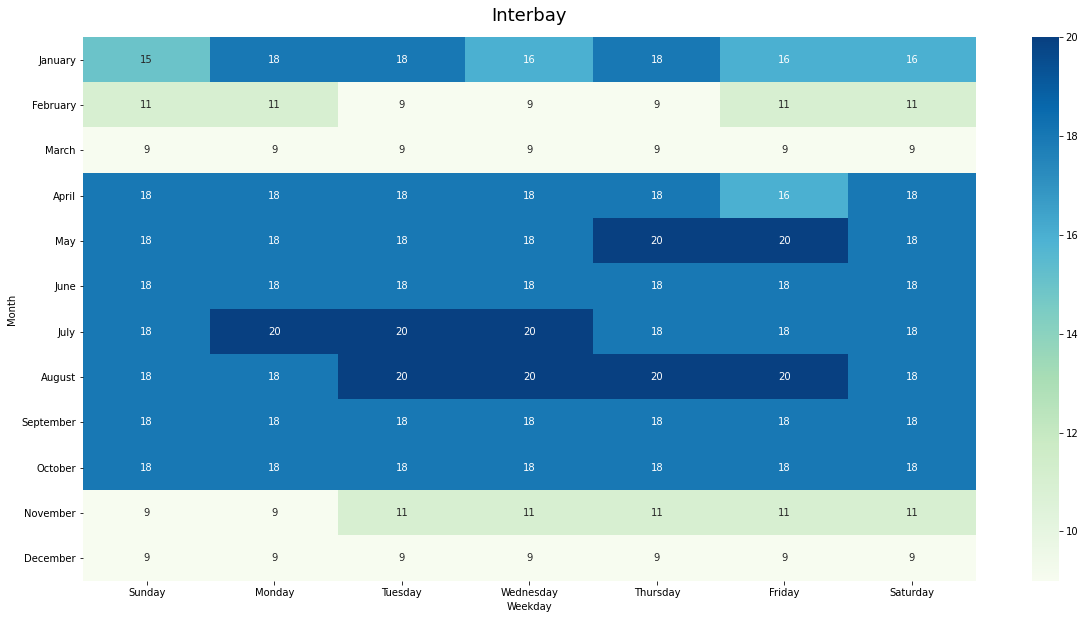

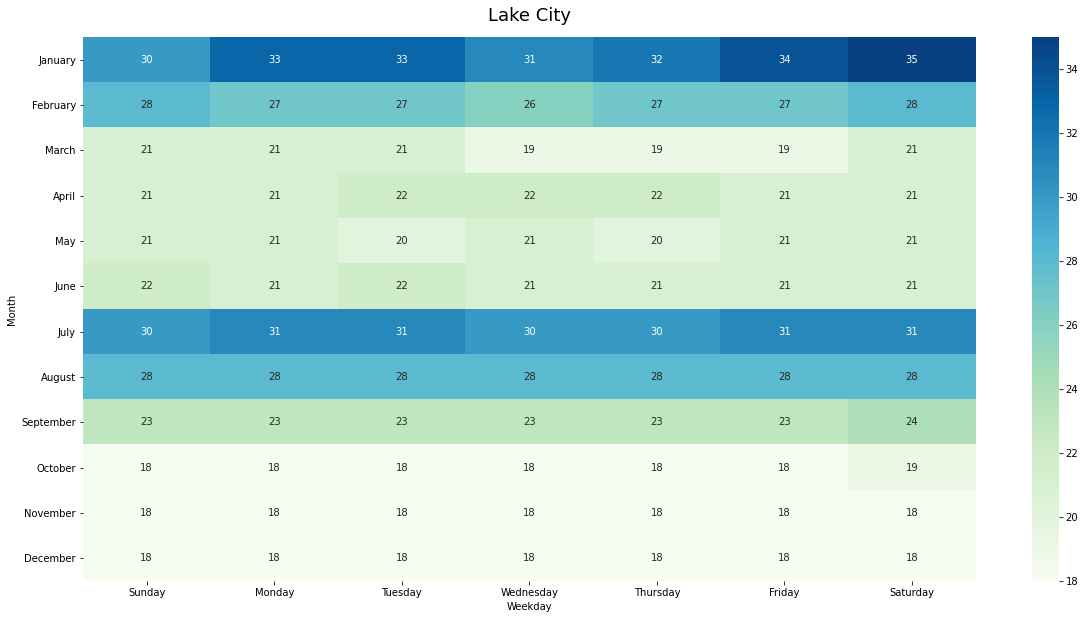

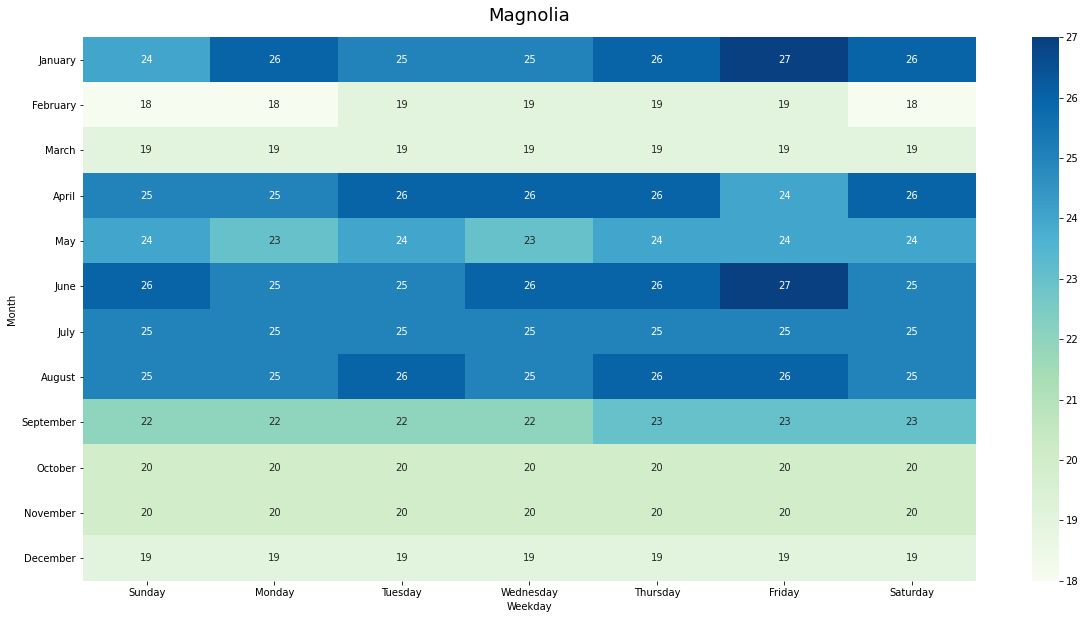

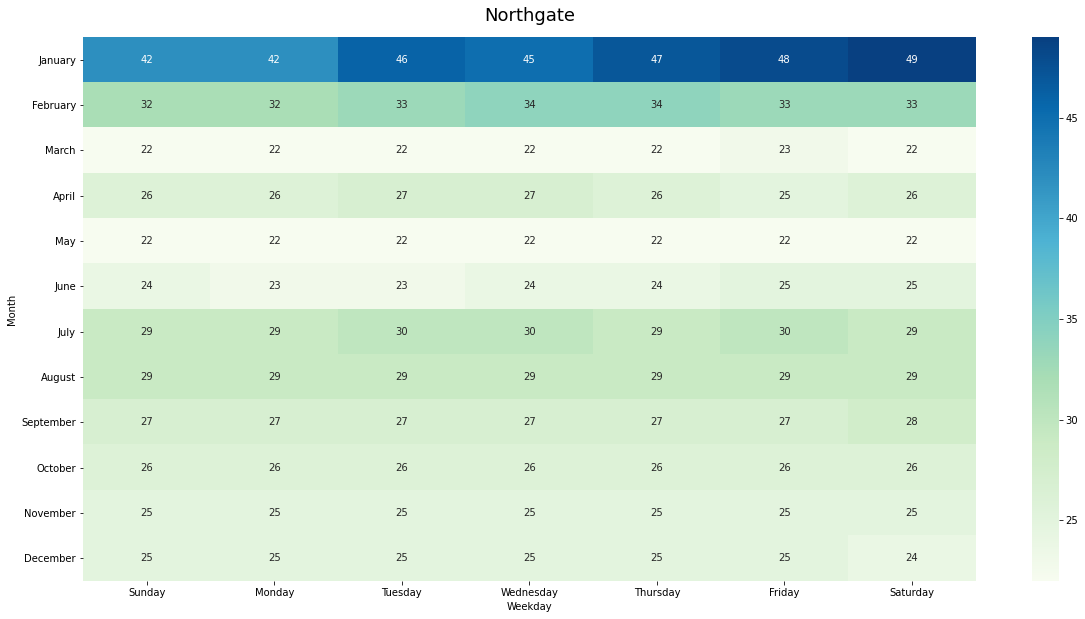

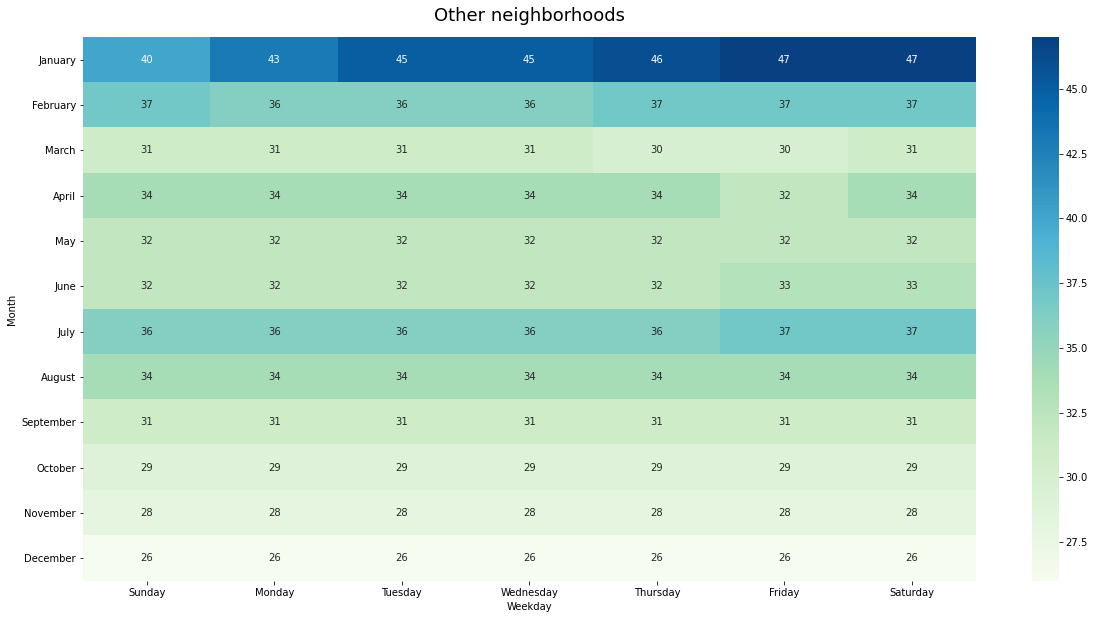

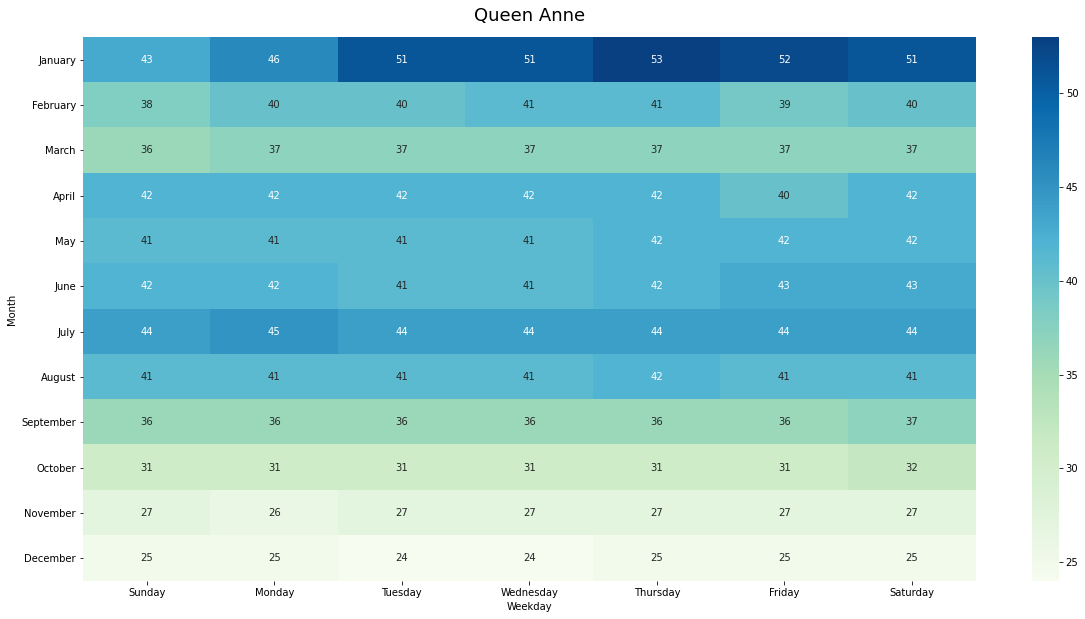

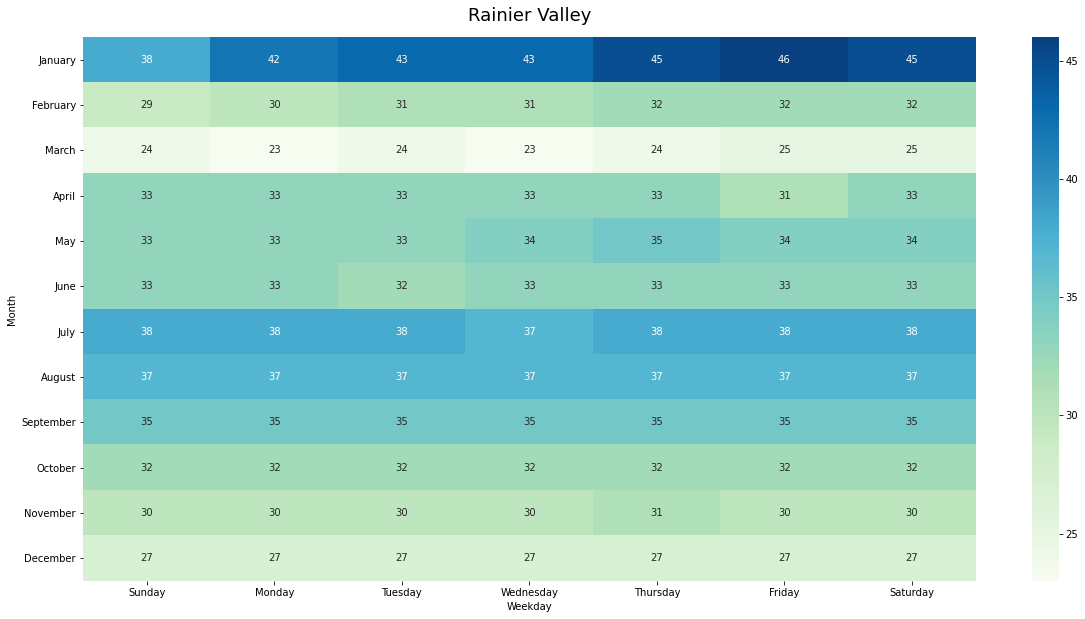

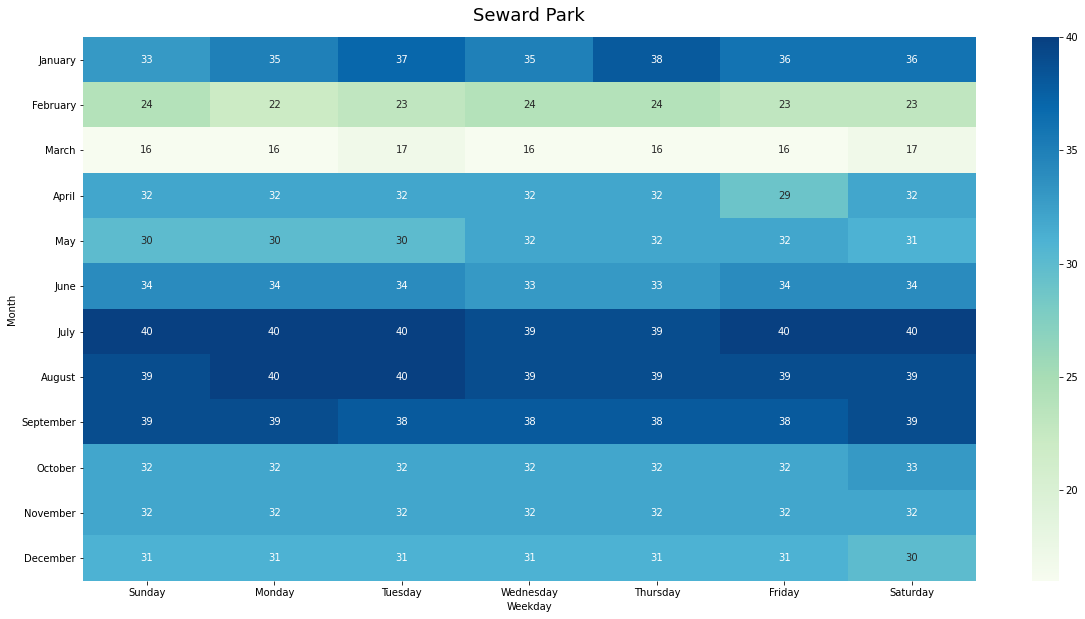

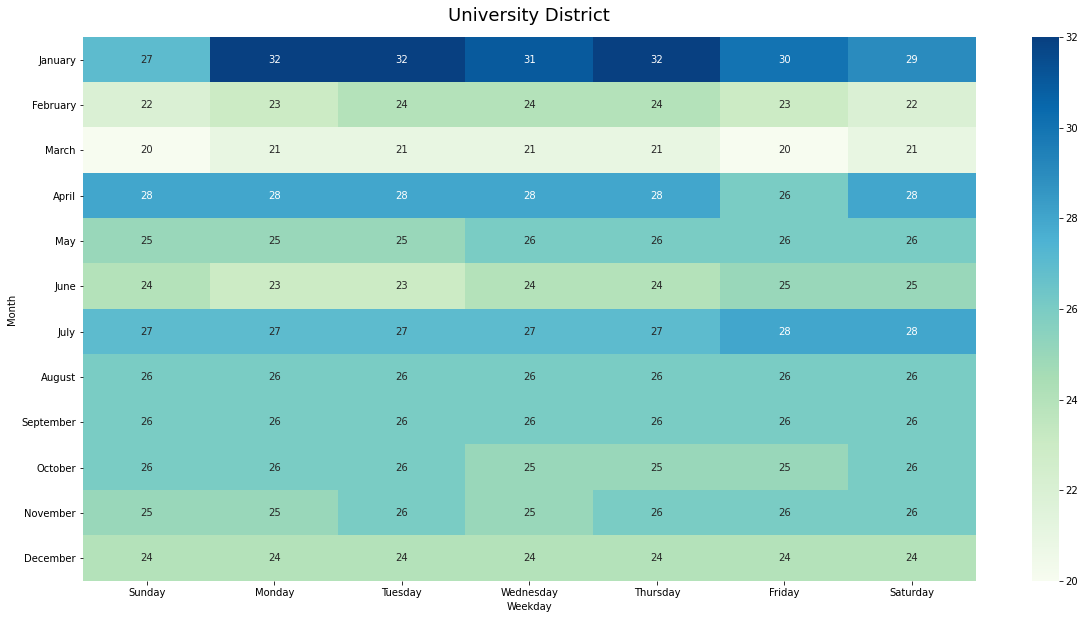

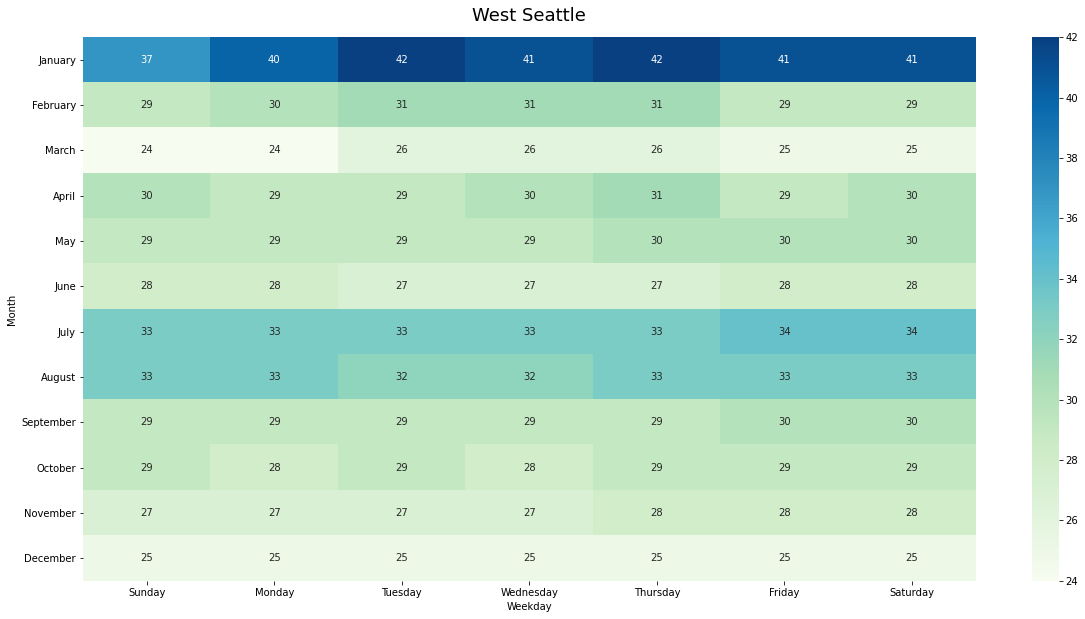

In [40]:
# Occupation percentage by neighbourhood group.

for item in  list(time_by_neighbourhood["type"].unique()):
    print("listings mean by "+ str(item)+" : " + str(len(calendar_df_time_features[calendar_df_time_features['neighbourhood_group_cleansed'] == item]["id"].unique())))
    df = time_by_neighbourhood[time_by_neighbourhood['type'] == item]
    df= df[["Month","Weekday","percentage_occupation"]]
    df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df = df.reindex(new_order, axis=0)
    new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    df = df[new_order_col]
    plt.figure(figsize=(20,10))
    heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
    heatmap.set_title(item, fontdict={'fontsize':18}, pad=16);

# accommodates : Month and Weekday

In [41]:
# Build target feature and dataframe to analyzed
time_by_accommodates = calendar_df_time_features[['id','accommodates','available','Month','Weekday']]
time_by_accommodates= time_by_accommodates.groupby(['accommodates', 'Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_accommodates.columns = ['type','Month','Weekday','listings_total','listings_available']
time_by_accommodates['percentage_occupation']= round(((time_by_accommodates['listings_total']-time_by_accommodates['listings_available'])/time_by_accommodates['listings_total'])*100)

listings mean by 1.0 : 256
listings mean by 2.0 : 1627
listings mean by 3.0 : 398
listings mean by 4.0 : 785
listings mean by 5.0 : 184
listings mean by 6.0 : 332
listings mean by 7.0 : 52
listings mean by 8.0 : 119
listings mean by 9.0 : 13
listings mean by 10.0 : 25
listings mean by 11.0 : 3
listings mean by 12.0 : 15
listings mean by 14.0 : 3
listings mean by 15.0 : 2
listings mean by 16.0 : 4


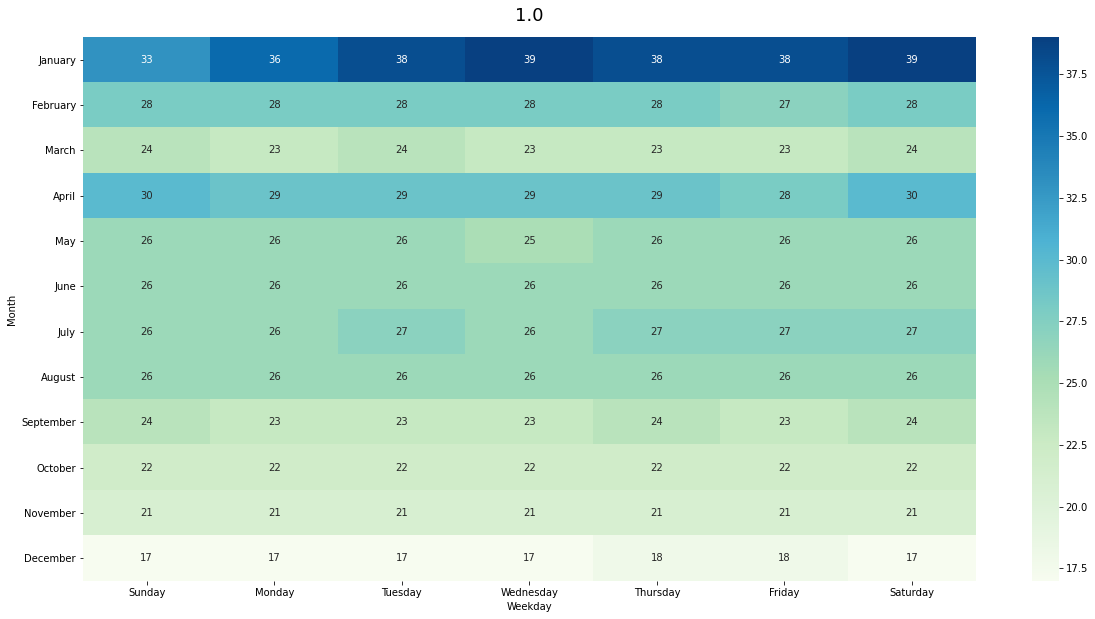

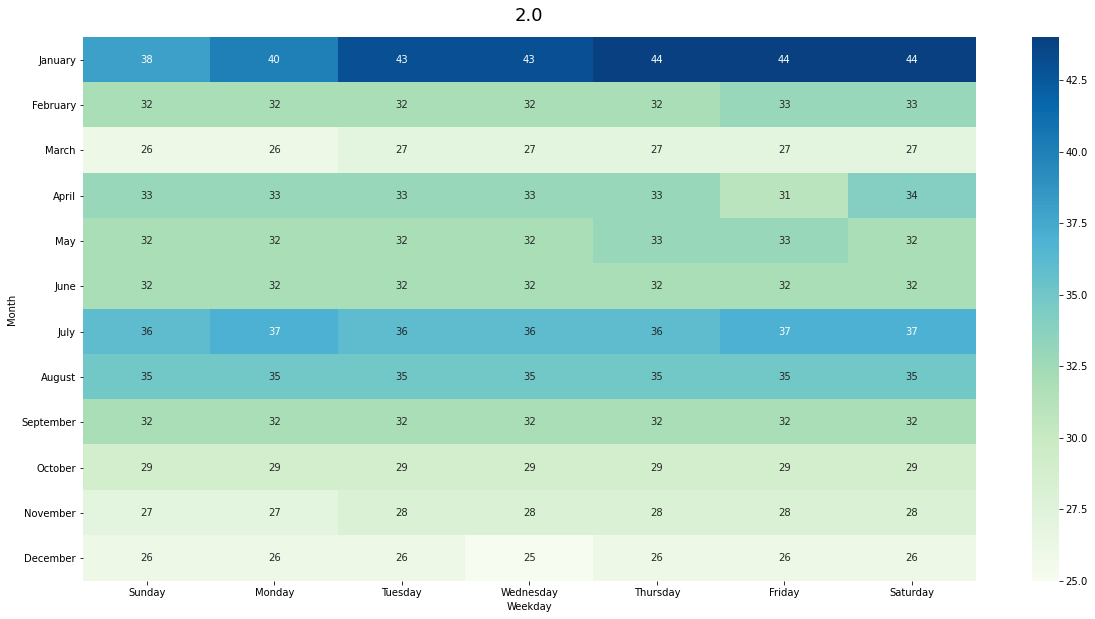

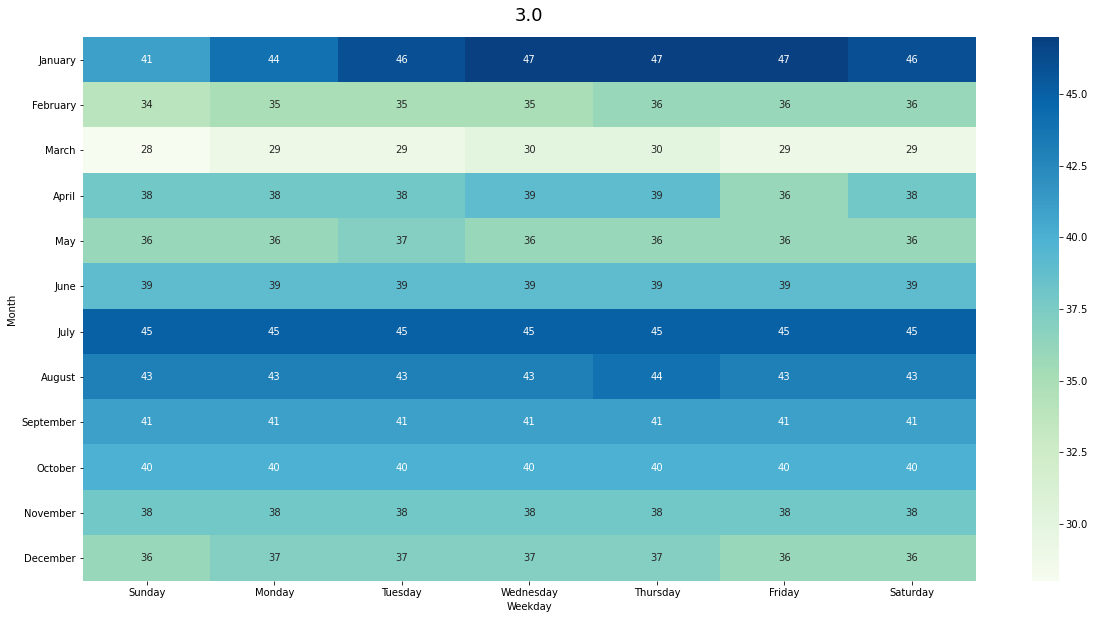

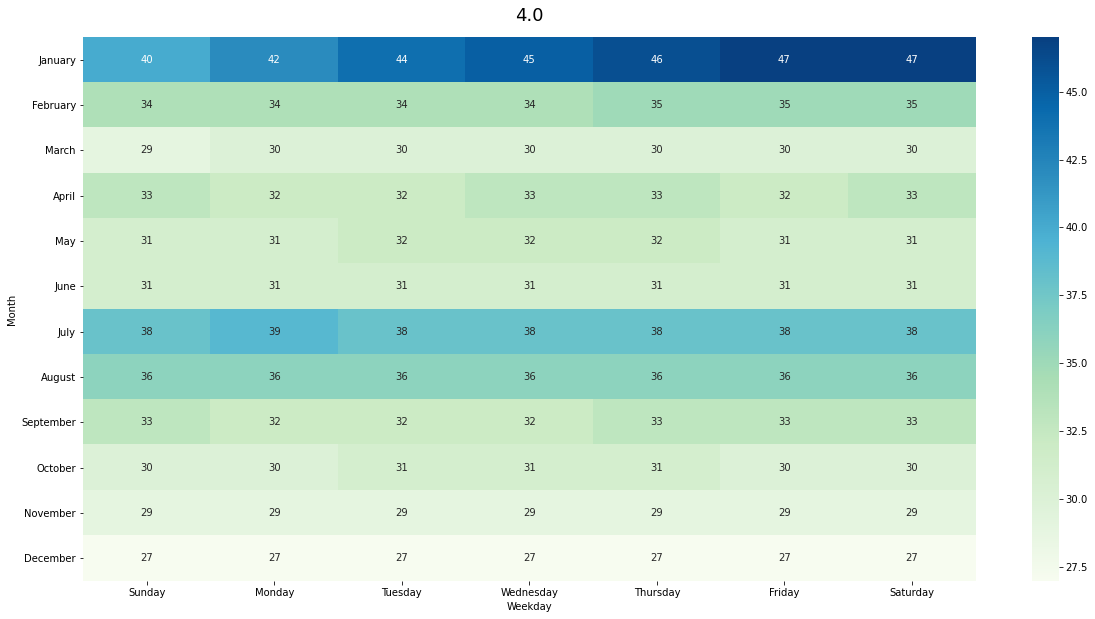

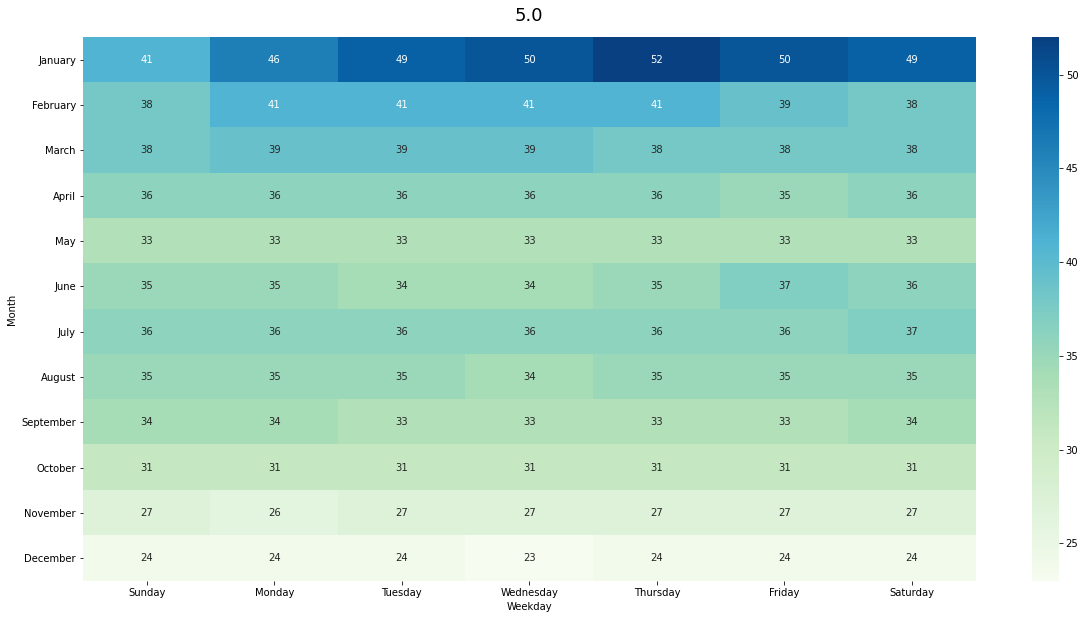

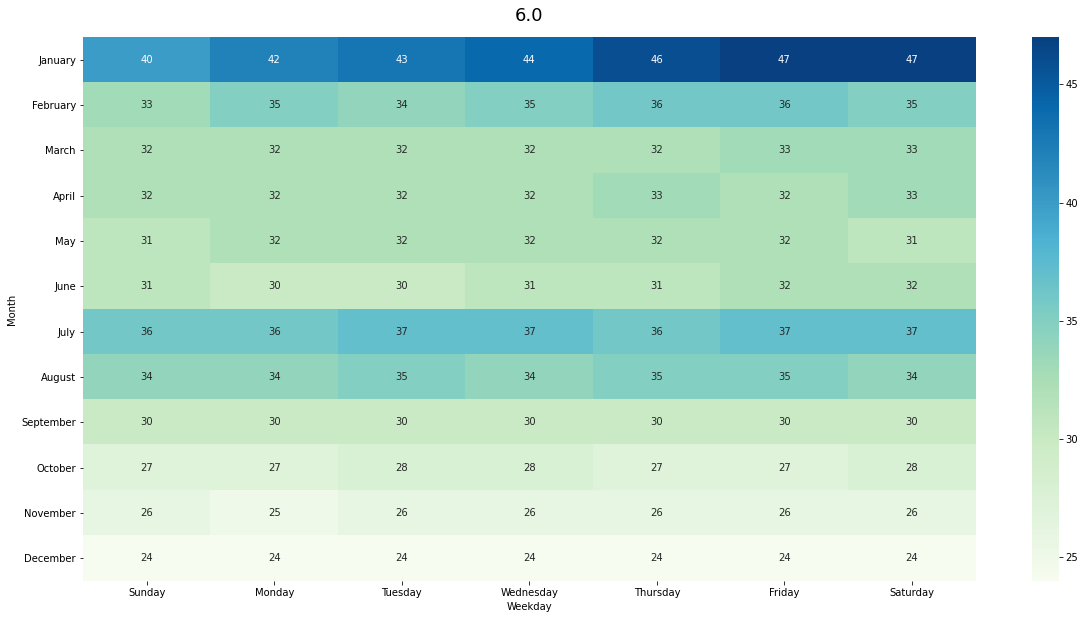

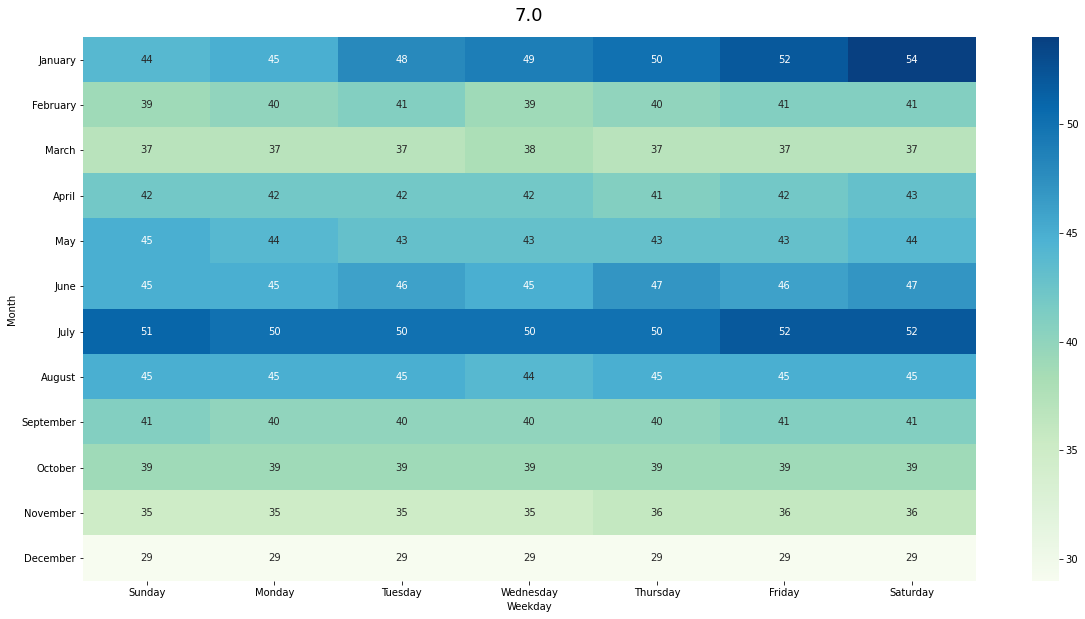

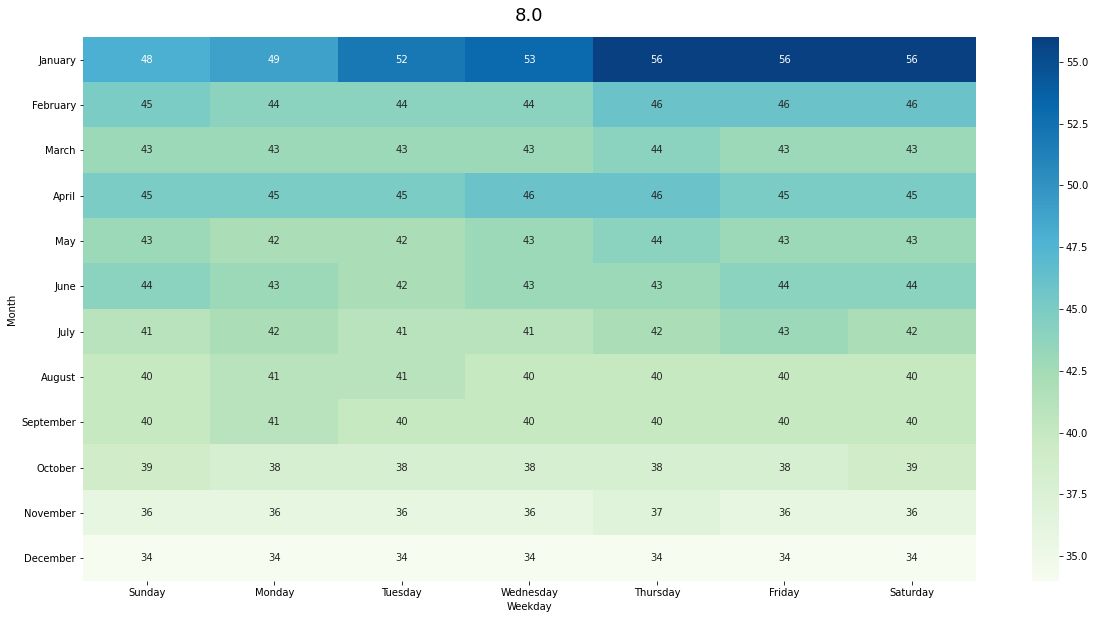

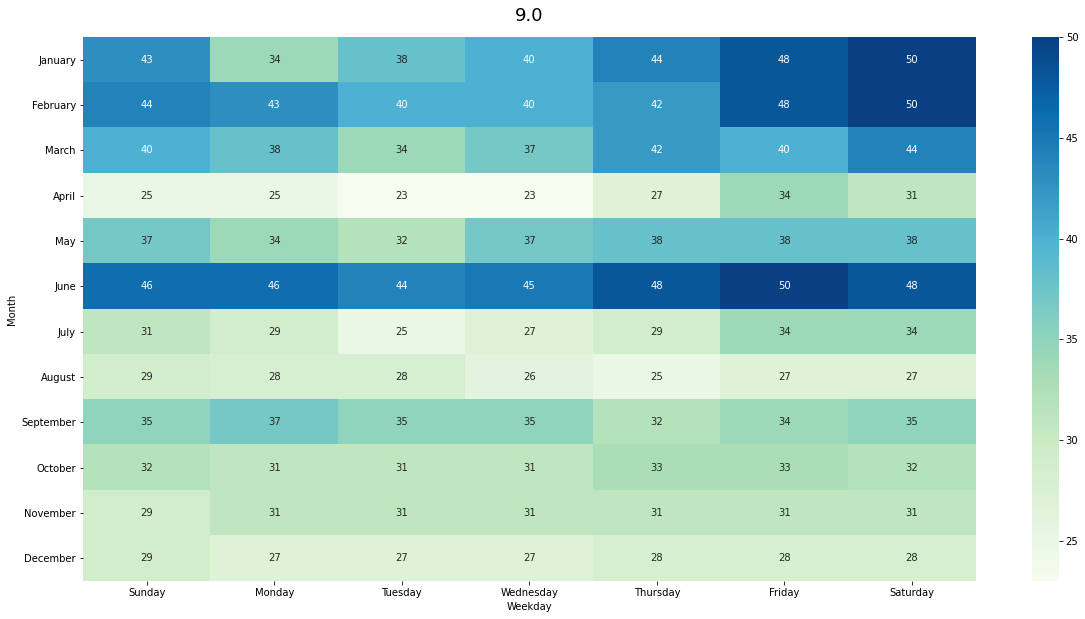

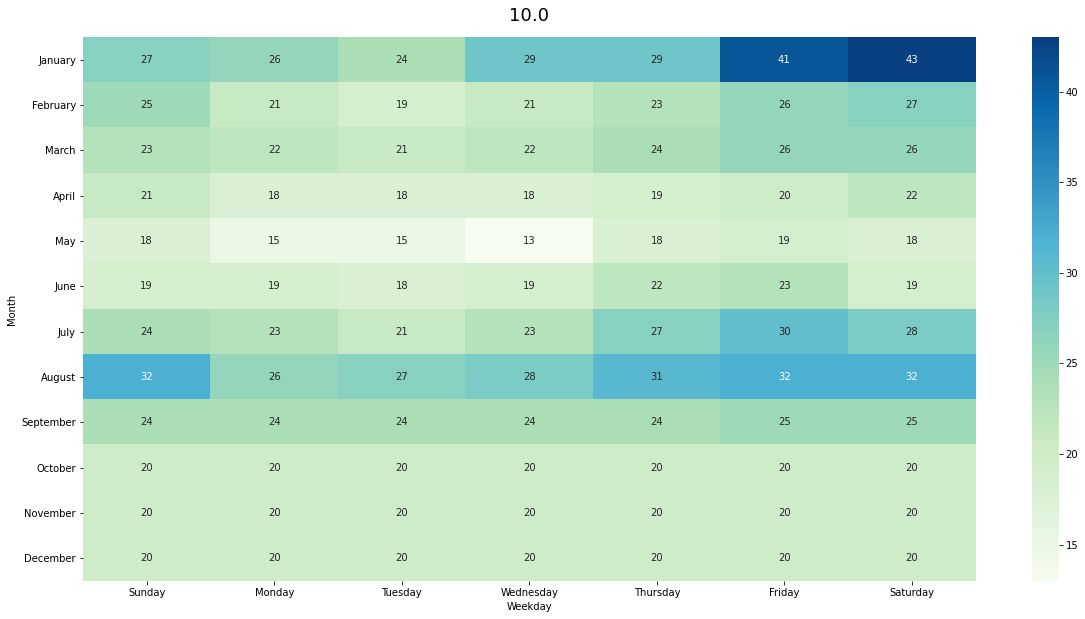

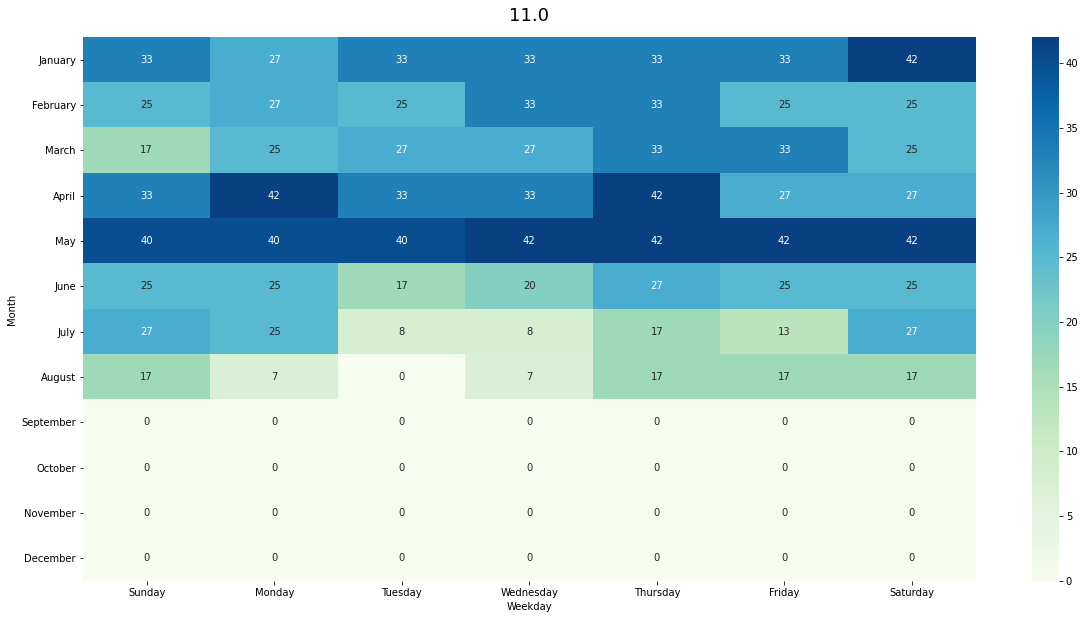

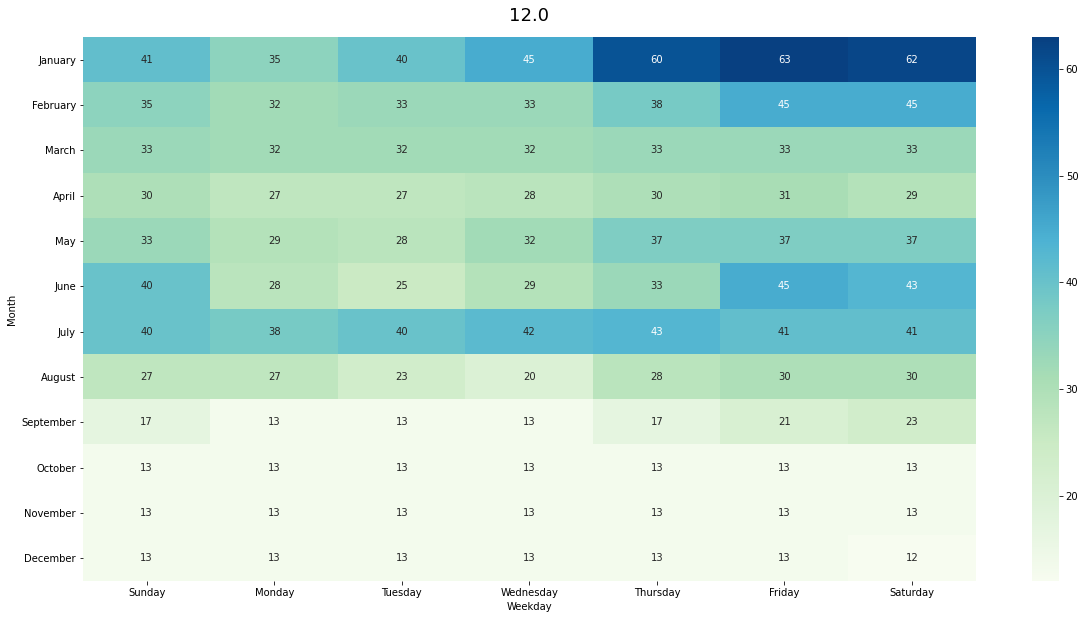

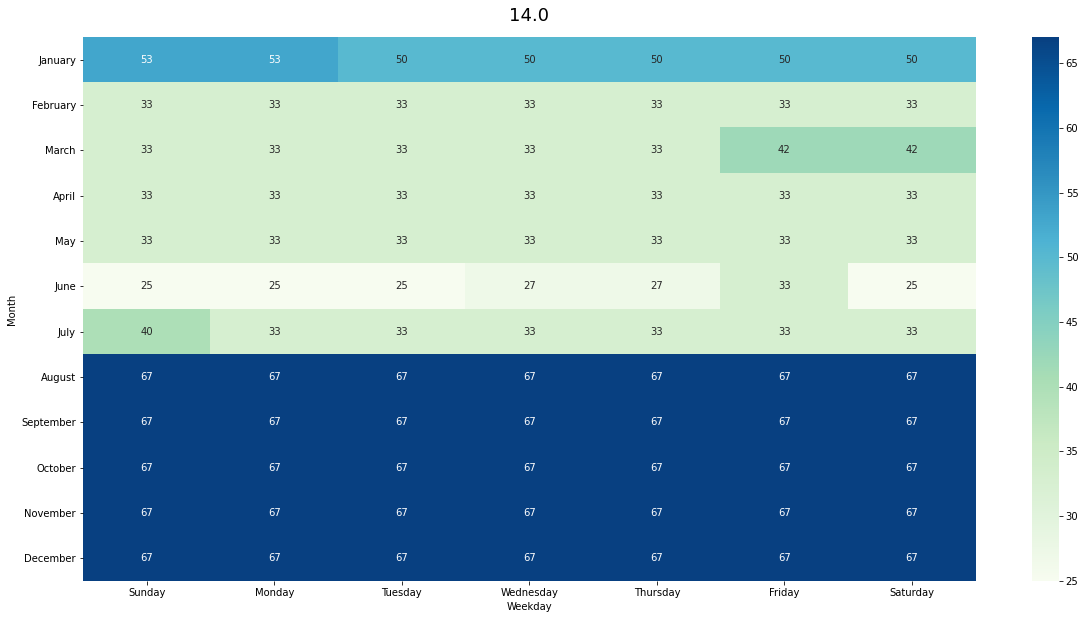

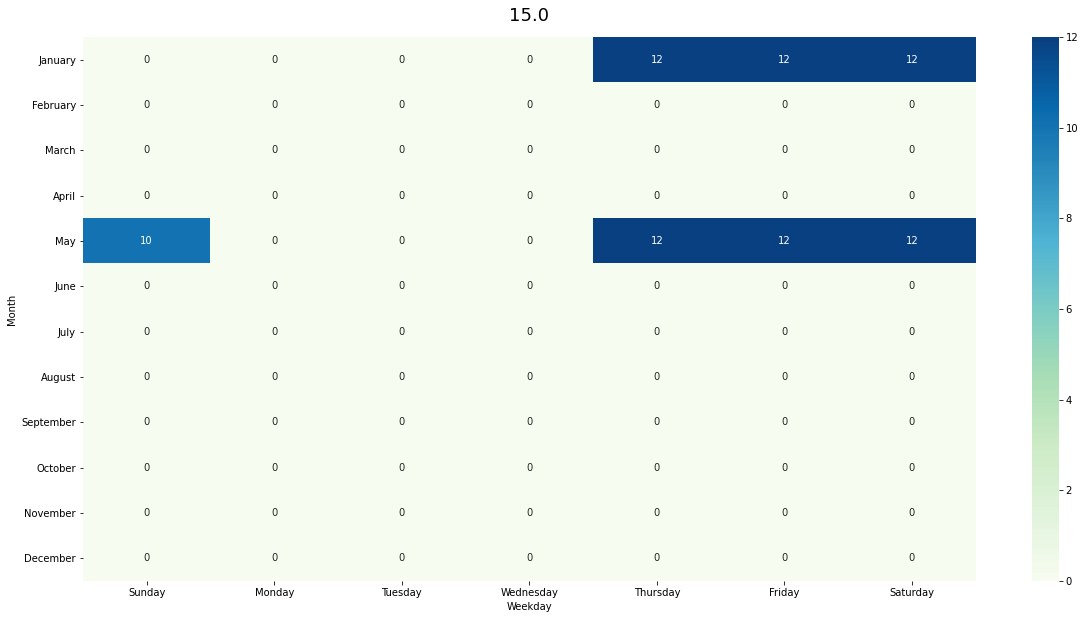

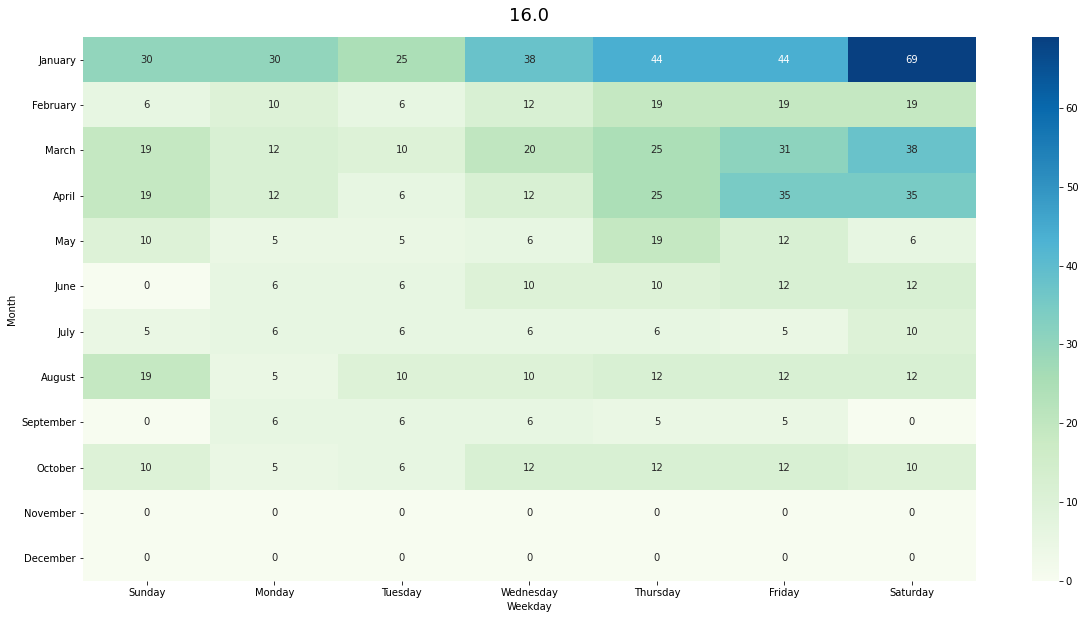

In [42]:
# Occupation percentage by accommodates.

for item in  list(time_by_accommodates["type"].unique()):
    print("listings mean by "+ str(item)+" : " + str(len(calendar_df_time_features[calendar_df_time_features['accommodates'] == item]["id"].unique())))
    df = time_by_accommodates[time_by_accommodates['type'] == item]
    df= df[["Month","Weekday","percentage_occupation"]]
    df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df = df.reindex(new_order, axis=0)
    new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    df = df[new_order_col]
    plt.figure(figsize=(20,10))
    heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
    heatmap.set_title(item, fontdict={'fontsize':18}, pad=16);

**3.How are the place with more prices ? Is high their occupation ?**

In [43]:
# General statistics 
listings_df_final.describe()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,host_is_superhost,host_has_profile_pic,host_identity_verified
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,94.886798,99.967159,7.157757,3.349398,1.259469,1.307712,127.976166,2.369303,22.223415,0.203772,0.998167,0.785490
std,2.962660e+06,11.023789,1.618332,28.620648,1.977599,0.589130,0.882700,90.250022,16.305902,37.730892,0.402854,0.042785,0.410536
min,3.335000e+03,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.258256e+06,94.886798,100.000000,1.000000,2.000000,1.000000,1.000000,75.000000,1.000000,2.000000,0.000000,1.000000,1.000000
50%,6.118244e+06,100.000000,100.000000,1.000000,3.000000,1.000000,1.000000,100.000000,2.000000,9.000000,0.000000,1.000000,1.000000
75%,8.035127e+06,100.000000,100.000000,3.000000,4.000000,1.000000,2.000000,150.000000,2.000000,26.000000,0.000000,1.000000,1.000000
max,1.034016e+07,100.000000,100.000000,502.000000,16.000000,8.000000,7.000000,1000.000000,1000.000000,474.000000,1.000000,1.000000,1.000000


In [44]:
# Build dataframe to analyzed (Expensive places)
perc85price = np.percentile(listings_df_final['price'], 85)
print(perc85price)
more_expensive= listings_df_final[listings_df_final['price'] >= perc85price]
more_expensive.describe()

NameError: name 'perc75price' is not defined

In [ ]:
# Build target feature and dataframe to analyzed.

listing_occupation_more_expensive = listing_occupation.merge(more_expensive, on='id', how='inner')
listing_occupation_more_expensive.set_index('id',inplace=True)

# Correlation in expensive place.
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(listing_occupation_more_expensive.corr()[['percentage_occupation']].sort_values(by='percentage_occupation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with percentage_occupation', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Expensive place by neighbourhood.
more_expensive.groupby(['neighbourhood_group_cleansed']).agg({'id': ['count']}).sort_values(by=[('id', 'count')], ascending=False)

In [ ]:
# Expensive place by property type.
more_expensive.groupby(['property_type']).agg({'id': ['count']}).sort_values(by=[('id', 'count')], ascending=False)

In [ ]:
# Expensive place by room type.
more_expensive.groupby(['room_type']).agg({'id': ['count']}).sort_values(by=[('id', 'count')], ascending=False)

In [ ]:
# Expensive place by host type.
more_expensive.groupby(['host_is_superhost']).agg({'id': ['count']}).sort_values(by=[('id', 'count')], ascending=False)

In [ ]:
# Expensive place by cancellation policy.
more_expensive.groupby(['cancellation_policy']).agg({'id': ['count']}).sort_values(by=[('id', 'count')], ascending=False)

In [ ]:
# Build target feature and dataframe to analyzed.
calendar_df_more_expensive = calendar_df.merge(more_expensive, on='id', how='inner')
time_by_more_expensive = calendar_df_more_expensive[['id','available','Month','Weekday']]
time_by_more_expensive= time_by_more_expensive.groupby(['Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_more_expensive.columns = ['Month','Weekday','listings_total','listings_available']
time_by_more_expensive['percentage_occupation']= round(((time_by_more_expensive['listings_total']-time_by_more_expensive['listings_available'])/time_by_more_expensive['listings_total'])*100)

In [ ]:
# Build dataframe to analyzed, occupation in the time.
df= time_by_more_expensive[["Month","Weekday","percentage_occupation"]]
df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = df.reindex(new_order, axis=0)
new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df = df[new_order_col]
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
heatmap.set_title("Places more expensive", fontdict={'fontsize':18}, pad=16);

In [ ]:
# Build dataframe to analyzed (cheaper places)
perc15price = np.percentile(listings_df_final['price'], 15)
print(perc15price)
more_cheap= listings_df_final[listings_df_final['price'] <= perc15price]
more_cheap.describe()

In [ ]:
# Build target feature and dataframe to analyzed.
calendar_df_more_cheap = calendar_df.merge(more_cheap, on='id', how='inner')
time_by_more_cheap = calendar_df_more_cheap[['id','available','Month','Weekday']]
time_by_more_cheap= time_by_more_cheap.groupby(['Month', 'Weekday']).agg({'id': ['count'],'available': ['sum']}).reset_index()
time_by_more_cheap.columns = ['Month','Weekday','listings_total','listings_available']
time_by_more_cheap['percentage_occupation']= round(((time_by_more_cheap['listings_total']-time_by_more_cheap['listings_available'])/time_by_more_cheap['listings_total'])*100)

In [ ]:
# Build dataframe to analyzed, occupation in the time.
df= time_by_more_cheap[["Month","Weekday","percentage_occupation"]]
df = df.pivot(index='Month', columns='Weekday', values='percentage_occupation')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = df.reindex(new_order, axis=0)
new_order_col = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df = df[new_order_col]
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(df, cmap="GnBu", annot=True)
heatmap.set_title("Places more cheaper", fontdict={'fontsize':18}, pad=16);

# **Model to predict percentage_occupation**

Simple model to estimate occupation percentage of a place in seattle.

In [ ]:
# Build target feature and dataframe.
listing_occupation_month = calendar_df.groupby(['id','Month']).agg({'date': ['count'],'available': ['sum']}).reset_index()
listing_occupation_month.columns = ['id','Month','days_total', 'day_available']
listing_occupation_month['percentage_occupation']= (listing_occupation_month['days_total']-listing_occupation_month['day_available'])/listing_occupation_month['days_total']

In [ ]:
listing_occupation_month

In [ ]:
## Buil dataframe to model.
df= listing_occupation_month.merge(listings_df_final, on='id', how='inner')
df['year_host_since']=df['host_since'].dt.year
df['year_first_review']=df['first_review'].dt.year
df['year_last_review']=df['last_review'].dt.year
df.drop(['host_since', 'first_review','last_review','day_available'], axis = 'columns', inplace=True)
df.set_index('id',inplace=True)
df=pd.get_dummies(df)


In [ ]:
#Train Random Forest Regressor model to predict
def forest_model(df,target_feature):
    y=df[target_feature]
    X=df.drop([target_feature], axis=1)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=50)
    forest = RandomForestRegressor(n_estimators=100, 
                                   criterion='mse', 
                                   random_state=42, 
                                   n_jobs=-1)
    forest.fit(X_train, y_train.squeeze())
    y_train_preds = forest.predict(X_train)
    y_test_preds = forest.predict(X_test)
    print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
    print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))
    #get feature importances from the model
    headers = ["name", "score"]
    values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

    features = forest_feature_importances['name'][:15]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:15]

    #plot feature importances
    plt.figure(figsize=(10,5))
    plt.bar(y_pos, scores, align='center', alpha=0.5)
    plt.xticks(y_pos, features, rotation='vertical')
    plt.ylabel('Score')
    plt.xlabel('Features')
    plt.title('Feature importances (Random Forest)')

    plt.savefig('feature importances RF.png')

    plt.show()
    
#Train XGBoost Regressor model to predict    
def XGBoost_model(df,target_feature):
    y=df[target_feature]
    X=df.drop([target_feature], axis=1)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=50)
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)

    #calculate and print scores for the model
    y_train_preds = xgb.predict(X_train)
    y_test_preds = xgb.predict(X_test)

    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_preds),
            mean_squared_error(y_test, y_test_preds)))
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_preds),
            r2_score(y_test, y_test_preds)))
    
    #get feature importances from the model
    headers = ["name", "score"]
    values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
    xgb_feature_importances = pd.DataFrame(values, columns = headers)

    #plot feature importances for top 15 features
    features = xgb_feature_importances['name'][:15]
    y_pos = np.arange(len(features))
    scores = xgb_feature_importances['score'][:15]

    plt.figure(figsize=(10,5))
    plt.bar(y_pos, scores, align='center', alpha=0.5)
    plt.xticks(y_pos, features, rotation='vertical')
    plt.ylabel('Score')
    plt.xlabel('Features')
    plt.title('Feature importances (XGBoost)')

    plt.savefig('feature importances XGB.png')

    plt.show()

In [ ]:
# Apply Random Forest Regressor:
forest_model(df,"percentage_occupation")

In [ ]:
# Apply XGBoost Regressor:
XGBoost_model(df,"percentage_occupation")